### Travel Package Purchase Prediction -Ensemble Techniques


# Table of Contents

###  Context
###  Data Dictionary
###  Problem
###  Libraries
###  Read and Understand Data
###  Data Preprocessing
###  Exploratory Data Analysis

####     .Univariate Analysis
####     .Bivariate and Multivariate Analysis

###  Missing value Detection and Treatment
###  Insights based on EDA
###  Outlier Detection

###  Model Building Bagging

####    .Decision Tree
####    .Bagging classifier
####     ..Random Forest

###  Model Building Boosting

####     .Adaboost
####     .Gradient Boost
####     .XGBoost
####     .Stacking Classifier

###  Conclusion

####   .Business Recommendations & Insights
####   .Misclassfication Analysis 


# .Libraries

In [1]:
#To install xgboost library use - 
!pip install xgboost
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.api as sm





from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
# For pandas profiling


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [2]:
## Loading dataset
df_tour =pd.read_csv('tour_package.csv')
df_Tour= df_tour.copy()

## print the  shape of the dataset
print(f"There are {df_Tour.shape[0]} rows and {df_Tour.shape[1]} columns ")

There are 4888 rows and 20 columns 


# view the first and last  5 rows of the dataset

In [3]:
df_Tour.head()

CustomerID  ProdTaken      Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1 41.00000     Self Enquiry         3          6.00000   
1      200001          0 49.00000  Company Invited         1         14.00000   
2      200002          1 37.00000     Self Enquiry         1          8.00000   
3      200003          0 33.00000  Company Invited         1          9.00000   
4      200004          0      nan     Self Enquiry         1          8.00000   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3            3.00000   
1        Salaried    Male                       3            4.00000   
2     Free Lancer    Male                       3            4.00000   
3        Salaried  Female                       2            3.00000   
4  Small Business    Male                       2            3.00000   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                3.00000        Single        1.00000   
1         Deluxe                4.00000      Divorced        2.00000   
2          Basic                3.00000        Single        7.00000   
3          Basic                3.00000      Divorced        2.00000   
4          Basic                4.00000      Divorced        1.00000   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                   0.00000   
1         0                       3       1                   2.00000   
2         1                       3       0                   0.00000   
3         1                       5       1                   1.00000   
4         0                       5       1                   0.00000   

  Designation  MonthlyIncome  
0     Manager    20993.00000  
1     Manager    20130.00000  
2   Executive    17090.00000  
3   Executive    17909.00000  
4   Executive    18468.00000

In [4]:
df_Tour.tail()

CustomerID  ProdTaken      Age    TypeofContact  CityTier  \
4883      204883          1 49.00000     Self Enquiry         3   
4884      204884          1 28.00000  Company Invited         1   
4885      204885          1 52.00000     Self Enquiry         3   
4886      204886          1 19.00000     Self Enquiry         3   
4887      204887          1 36.00000     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
4883          9.00000  Small Business    Male                       3   
4884         31.00000        Salaried    Male                       4   
4885         17.00000        Salaried  Female                       4   
4886         16.00000  Small Business    Male                       3   
4887         14.00000        Salaried    Male                       4   

      NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
4883            5.00000         Deluxe                4.00000     Unmarried   
4884            5.00000          Basic                3.00000        Single   
4885            4.00000       Standard                4.00000       Married   
4886            4.00000          Basic                3.00000        Single   
4887            4.00000          Basic                4.00000     Unmarried   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
4883        2.00000         1                       1       1   
4884        3.00000         1                       3       1   
4885        7.00000         0                       1       1   
4886        3.00000         0                       5       0   
4887        3.00000         1                       3       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  
4883                   1.00000         Manager    26576.00000  
4884                   2.00000       Executive    21212.00000  
4885                   3.00000  Senior Manager    31820.00000  
4886                   2.00000       Executive    20289.00000  
4887                   2.00000       Executive    24041.00000

In [5]:
## get the name of the columns
print("Features :\n\n", df_Tour.columns.tolist())

## get the number of missing values in the dataset
print("\nMissing values : \n\n", df_Tour.isnull().sum().sort_values(ascending=False))

## get the percentage of missing values in the dataset
print("\nPercent of Missing values: \n\n ", round(df_Tour.isna().sum()/ df_Tour.isna().count() *100, 2).sort_values(ascending= False))

Features :

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']

Missing values : 

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID         

# check the data types of the dataset

In [6]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Observations

#### ... There is a sizeable amount of missing values.

#### ... DurationOfPitch has about 5% of missing values, and duration of pitch might play quite a significant role in determining whether the new product is accepted by the consumer

#### ... 4.77% of values are missing inthe monthly income

#### ... Age has 4.62% of missing values

#### ... NumberofChildrenVisiting, NumberofFollowups, PrefferedPropertyStar, NumberofTrips and TypeofContacts all have less than 3% of missing values

#### ... ProdTaken is the target variable

#### ... Designation, CityTier, Occupation, OwnCar, Gender, PrefferedPropertyStar, TypeofContact, and Passport are categorical variable while others are numerical varaible



## Summary of the dataset

In [7]:
df_Tour.describe().T

count         mean        std          min  \
CustomerID               4888.00000 202443.50000 1411.18839 200000.00000   
ProdTaken                4888.00000      0.18822    0.39092      0.00000   
Age                      4662.00000     37.62227    9.31639     18.00000   
CityTier                 4888.00000      1.65426    0.91658      1.00000   
DurationOfPitch          4637.00000     15.49083    8.51964      5.00000   
NumberOfPersonVisiting   4888.00000      2.90507    0.72489      1.00000   
NumberOfFollowups        4843.00000      3.70845    1.00251      1.00000   
PreferredPropertyStar    4862.00000      3.58104    0.79801      3.00000   
NumberOfTrips            4748.00000      3.23652    1.84902      1.00000   
Passport                 4888.00000      0.29092    0.45423      0.00000   
PitchSatisfactionScore   4888.00000      3.07815    1.36579      1.00000   
OwnCar                   4888.00000      0.62029    0.48536      0.00000   
NumberOfChildrenVisiting 4822.00000      1.18727    0.85786      0.00000   
MonthlyIncome            4655.00000  23619.85349 5380.69836   1000.00000   

                                  25%          50%          75%          max  
CustomerID               201221.75000 202443.50000 203665.25000 204887.00000  
ProdTaken                     0.00000      0.00000      0.00000      1.00000  
Age                          31.00000     36.00000     44.00000     61.00000  
CityTier                      1.00000      1.00000      3.00000      3.00000  
DurationOfPitch               9.00000     13.00000     20.00000    127.00000  
NumberOfPersonVisiting        2.00000      3.00000      3.00000      5.00000  
NumberOfFollowups             3.00000      4.00000      4.00000      6.00000  
PreferredPropertyStar         3.00000      3.00000      4.00000      5.00000  
NumberOfTrips                 2.00000      3.00000      4.00000     22.00000  
Passport                      0.00000      0.00000      1.00000      1.00000  
PitchSatisfactionScore        2.00000      3.00000      4.00000      5.00000  
OwnCar                        0.00000      1.00000      1.00000      1.00000  
NumberOfChildrenVisiting      1.00000      1.00000      2.00000      3.00000  
MonthlyIncome             20346.00000  22347.00000  25571.00000  98678.00000

##  Observations


##### ....Minimum  Age of Customers is 18 and Maximum Age of the  Customers is 61

##### ....Minimum time spent on DurationofPitch is 5mins while Max is 127mins

##### ....Minimum number of trips made by the customer is 1, mean trip made by the Customers was 3 trips and  Max trip made by the Customer is 22

##### ....The Min PitchSatisfactionScore is 3 which is kind of high and the Max PitchSatisfactionScore is 5

###### .... The Min MonthlyIncome is 4655 and the Max MonthlyIncome is 98678


##### ..DataPreprocessing

In [8]:
#### . Drop the CustomerID column


In [9]:
df_Tour.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
df_Tour.tail()

ProdTaken      Age    TypeofContact  CityTier  DurationOfPitch  \
4883          1 49.00000     Self Enquiry         3          9.00000   
4884          1 28.00000  Company Invited         1         31.00000   
4885          1 52.00000     Self Enquiry         3         17.00000   
4886          1 19.00000     Self Enquiry         3         16.00000   
4887          1 36.00000     Self Enquiry         1         14.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3            5.00000   
4884        Salaried    Male                       4            5.00000   
4885        Salaried  Female                       4            4.00000   
4886  Small Business    Male                       3            4.00000   
4887        Salaried    Male                       4            4.00000   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                4.00000     Unmarried        2.00000   
4884          Basic                3.00000        Single        3.00000   
4885       Standard                4.00000       Married        7.00000   
4886          Basic                3.00000        Single        3.00000   
4887          Basic                4.00000     Unmarried        3.00000   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                   1.00000   
4884         1                       3       1                   2.00000   
4885         0                       1       1                   3.00000   
4886         0                       5       0                   2.00000   
4887         1                       3       1                   2.00000   

         Designation  MonthlyIncome  
4883         Manager    26576.00000  
4884       Executive    21212.00000  
4885  Senior Manager    31820.00000  
4886       Executive    20289.00000  
4887       Executive    24041.00000

In [11]:
df_Tour['Age']

0      41.00000
1      49.00000
2      37.00000
3      33.00000
4           nan
         ...   
4883   49.00000
4884   28.00000
4885   52.00000
4886   19.00000
4887   36.00000
Name: Age, Length: 4888, dtype: float64

In [12]:
## store categorical columns in a variable called cat_cols

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact', 'PreferredPropertyStar'
             ]

In [13]:
for i in cat_cols:
    print('Unique values in', i, 'are: ')
    print(df_Tour[i].value_counts())
    print('*'*50)

Unique values in Designation are: 
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are: 
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are: 
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are: 
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are: 
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are: 
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are: 


## ..Observations


##### .. A large percentage of the customers were either Executive Members or Senior Managers

##### .. Female and Fe Male are actually the same thing , there is a mistake which we would correct

####  .. This new product was pitched to mostly  pitched to Salary Earners and MSME's

####  .. Single and Unmarried are not the same thing, as Unmarried are customers that have Patners and are not married

####  .. The most PreferredPropertyStar is the 3 star property

#### .. Preprocessing Gender status

##### .. Fixing Fe Male to Female

In [14]:
df_Tour['Gender']= df_Tour['Gender'].apply(lambda x:'Female' if x=='Fe Male' else x)

In [15]:
df_Tour.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [16]:
## Converting the data type of the  categorical columns to category

df_Tour[cat_cols]= df_Tour[cat_cols].astype('category')

df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [17]:
df_Tour.describe(include=['category']).T

count  unique           top       freq
ProdTaken                   4888       2             0       3968
TypeofContact               4863       2  Self Enquiry       3444
CityTier                    4888       3             1       3190
Occupation                  4888       4      Salaried       2368
Gender                      4888       2          Male       2916
ProductPitched              4888       5         Basic       1842
PreferredPropertyStar 4862.00000 3.00000       3.00000 2993.00000
MaritalStatus               4888       4       Married       2340
Passport                    4888       2             0       3466
OwnCar                      4888       2             1       3032
Designation                 4888       5     Executive       1842

#### .. Age can play a very vital role in decision making

#### ...a Young Adult might make a decision to choose the new product which is tourism based on how the sales personal was able to pitch the proudct 

#### .. while another customer might make his/her decision based on his/her Marital status

#### .. So in order to understand how Age plays a vital role, we would group the Ages into bins and analyse them

In [18]:
df_Tour['Age Bin'] = pd.cut(df_Tour['Age'], bins = [18, 25, 31, 40, 50, 65], labels= ['18-25', '26-30', '31-40', '41-50', '50-65'])

In [19]:
df_Tour ['Age Bin'].value_counts()

31-40    1722
41-50    1073
26-30     971
50-65     549
18-25     333
Name: Age Bin, dtype: int64

#### .. Monthly  income can play a huge part in a customer decision, because if the customer has a lower income range he might not even consider the new products

##### .. we would also group MonthlyIncome into bins

In [20]:
df_Tour.MonthlyIncome.describe()

count    4655.00000
mean    23619.85349
std      5380.69836
min      1000.00000
25%     20346.00000
50%     22347.00000
75%     25571.00000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [21]:
df_Tour['IncomeBin'] = pd.cut(df_Tour['MonthlyIncome'], bins =[0,15000,20000,25000,30000,35000,40000,100000], labels= ['<15000', '<20000', '<25000', '<30000', '<35000', '<40000','<100000'])

In [22]:
df_Tour.IncomeBin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<100000       2
<15000        2
Name: IncomeBin, dtype: int64

In [23]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [24]:
pip install --user seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\maingate\appdata\roaming\python\python37\site-packages (0.11.2)Note: you may need to restart the kernel to use updated packages.



# .. Exploratory Data Analysis

### . Univariate Analysis

In [25]:
# Lets create functions  that would carry out exploratory data analysis using various plot

def dist_box(data):
    ## this function plots a combined graph of univariate analysis for continuous varaible
    ## to check the spread of central tendency, dispersion and outliers
    Name =data.name.upper()
    fig, (ax_box, ax_dis) =plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios':(.35, .85)}, figsize=(9,6))
    mean= data.mean()
    median= data.median()
    mode= data.mode().to_list()[0]
    sns.set_theme(style ='white')
    fig.suptitle('Spread Of Data For '+ Name , fontsize=16, fontweight='bold' )
    sns.boxplot(x=data, showmeans=True, orient ='h', color='skyblue', ax= ax_box)
    ## remove the x axis from the boxplot
    ax_box.set(xlabel ='')
    ## for better visualisation. this will set the background to white
    sns.despine(top=True, right=True, left=True) # to remove the sideline fro, the graph
    sns.distplot(data, kde=True, color='red', ax=ax_dis)
    ax_dis.axvline(mean, color='black', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


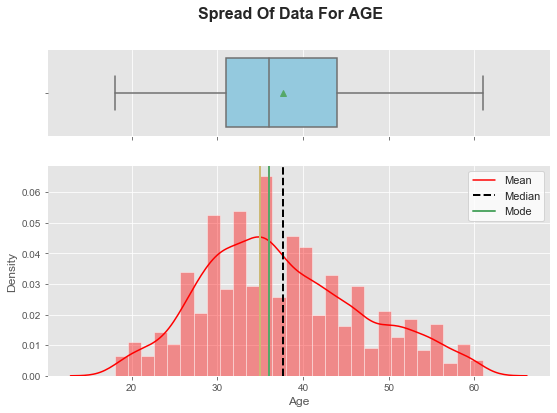

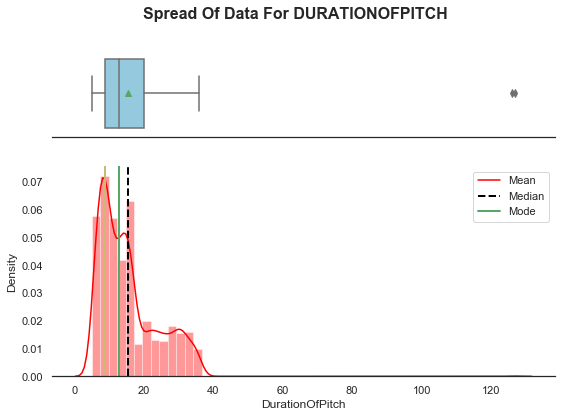

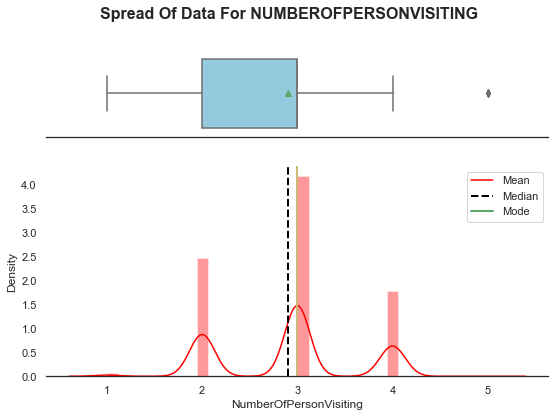

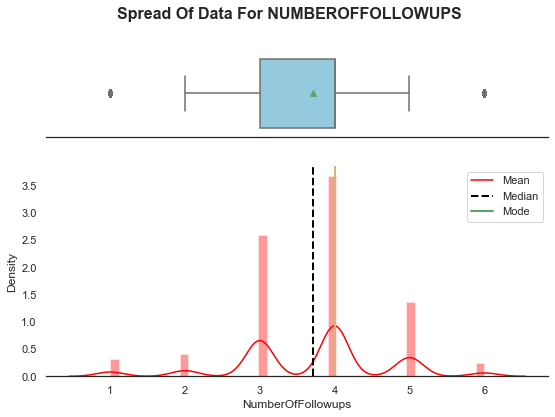

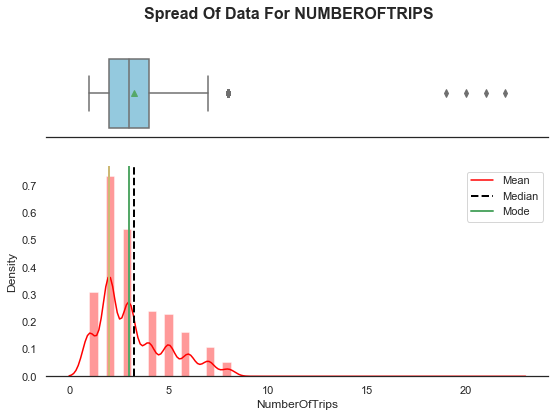

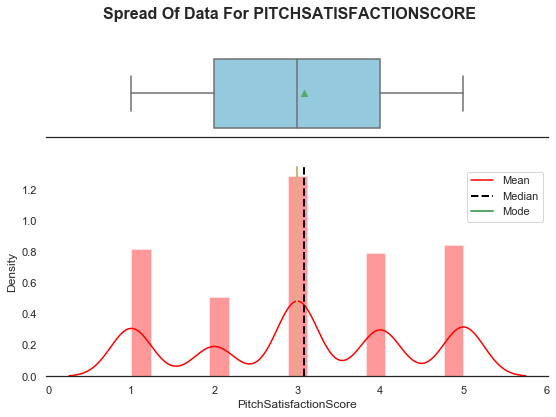

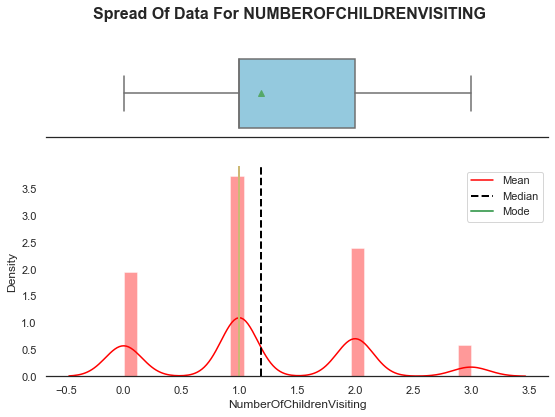

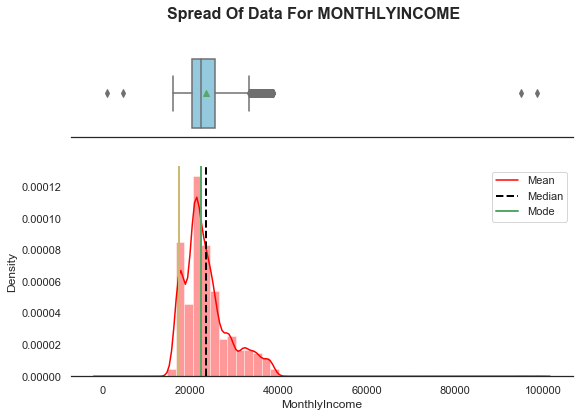

In [26]:
## select all quantitative columns for checking the spread

list_col= df_Tour.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_Tour[list_col[i]])

## .. Observations
#### .  Age is normally distributed 
#### .  The Duration of Pitch is rightly skewed and has an outlier of 120mins, which seems kind of abnormal because most of the data provided shows that the duration is between 4-40
#### .  The Number of Persons visiting has an outlier of 5 
#### .  The Number of Follow ups done by the sales personel has an outlier of 1 and 6 and a mean of 3. Which tells us that something might have caused the sales personel to have 1 and 6 follow ups in the distribution, which we might need to investigate
#### .  The average Number of Trips by the customers is 3, the distribution is rightly skewed and we have outliers between 10-20
#### .  The mean Pitch Satisfaction Score is 3
#### .  The average value for monthly Income is 20000,  and the outlier ranges from 0-1000 and 40000-100000

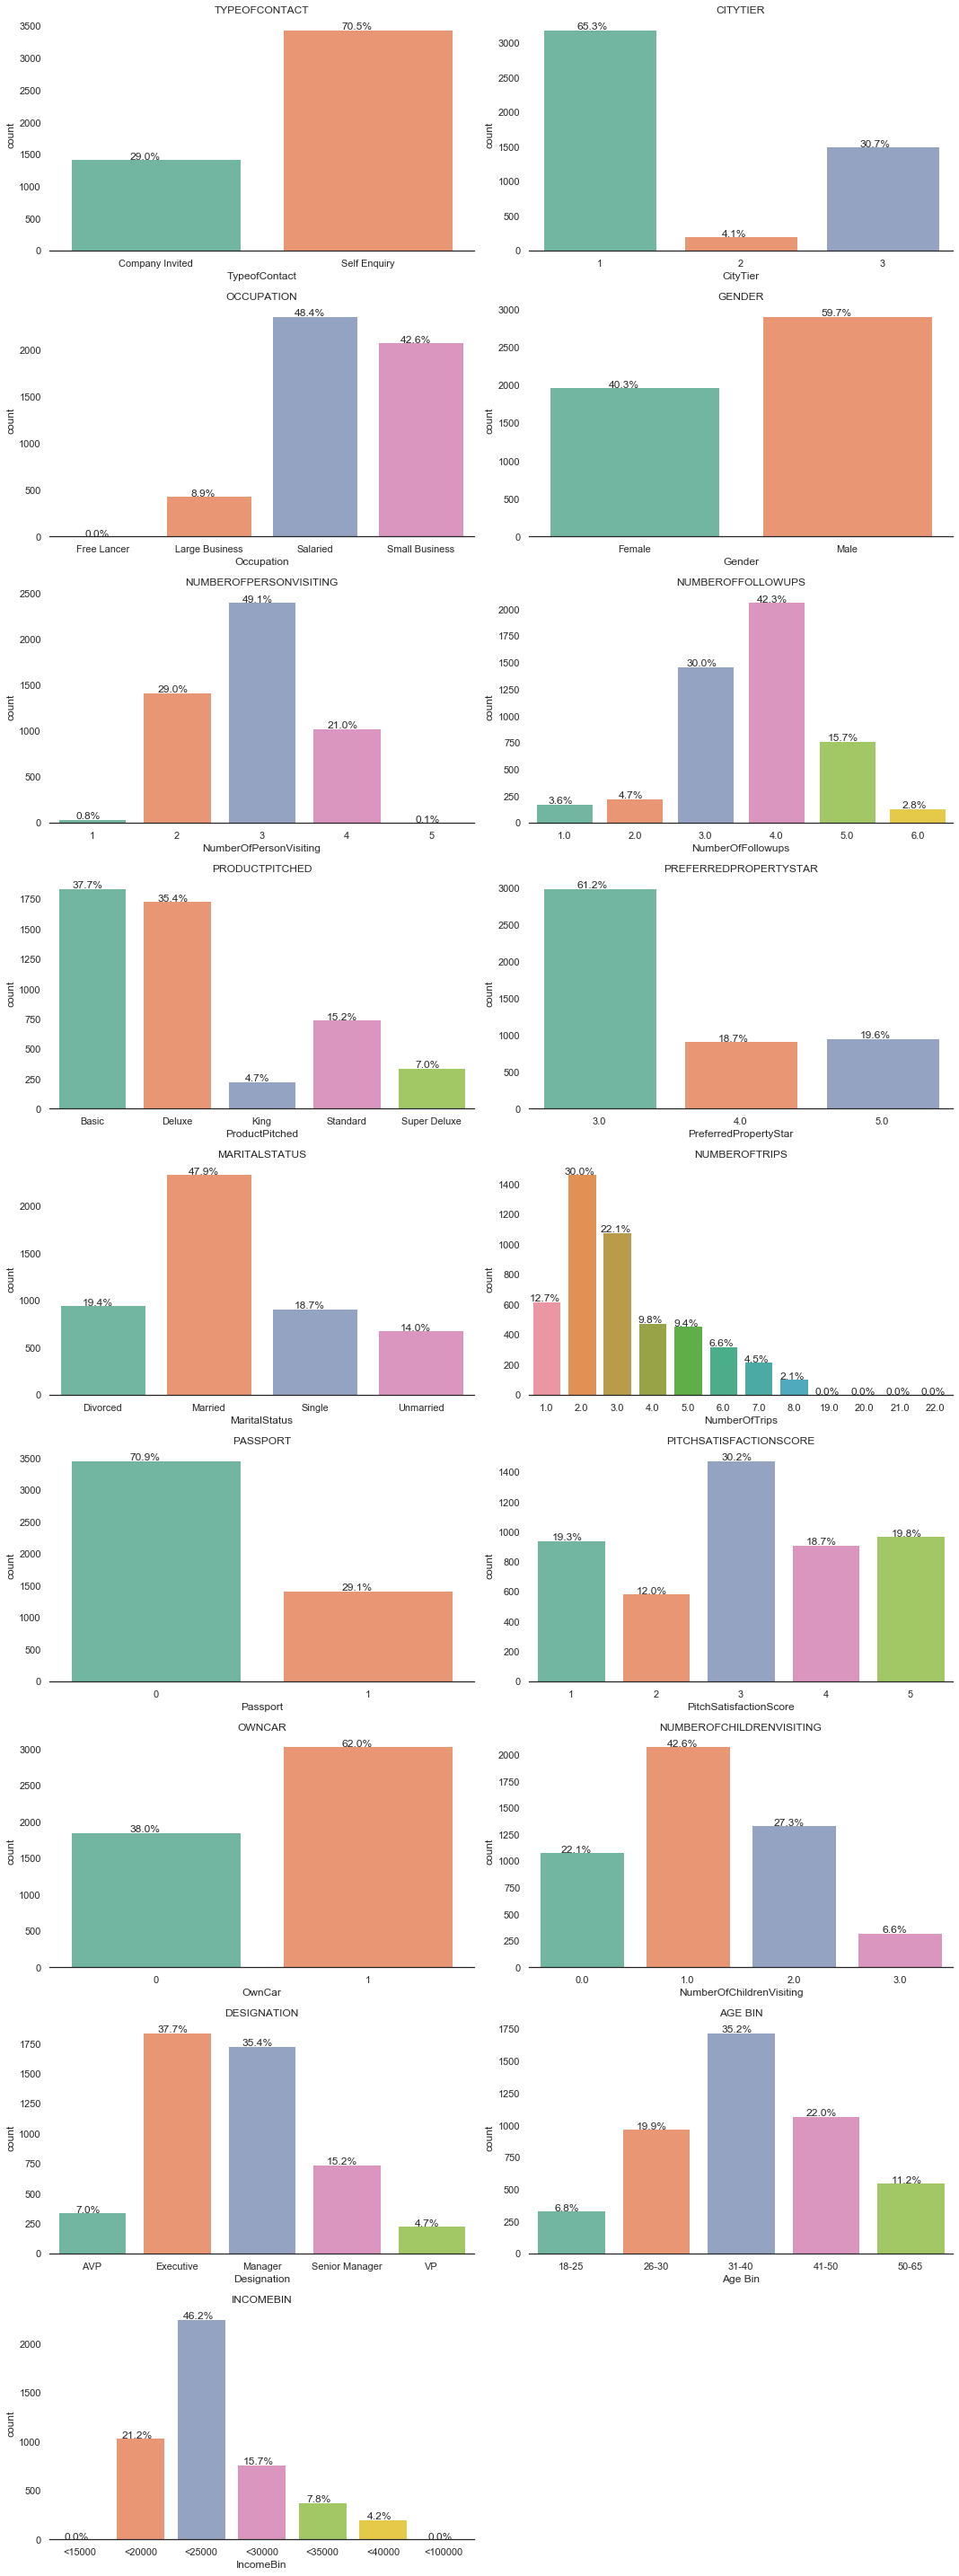

In [27]:
## Making a plot for the categorical datasets
plt.figure(figsize=(15,40))

sns.set_theme(style='white')

cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 
        'Designation','Age Bin','IncomeBin']

for i, variable in enumerate(cols):
    
                   plt.subplot(9,2,i+1)
                   ## to set the palette
                   sns.set_palette('Set2')
                   ax =sns.countplot(x=df_Tour[variable], data=df_Tour)
                   sns.despine(top=True, right=True, left=True) # to remove side line from graph
                   for p in ax.patches:
                        
                       percentage= '{:.1f}%'.format(100*p.get_height()/len(df_Tour[variable]))
                       x= p.get_x() + p.get_width() / 2 -0.05
                       y= p.get_y() + p.get_height()
                       plt.annotate(percentage, (x,y), ha='center')
                       plt.tight_layout()
                       plt.title(cols[i].upper())
        

### . Observations

#### .  . About 70% of customers made enquiry obut the products and around 30% of customers were invited by the company
##### .     .. key question is why were 30% of the customers  giving invitation to know more about the product??

#### .  . 65% of customers are from city Tier 1 and 30% are from city Tier 3
##### .     .. key questions why are most of our customers from city tier 1 and not 2 , does it have to do with the category of product we are offering to them??

#### .  . about 48% of our customers are salary earners , 42% own small buisnesses and 9% own large buisnesses

#### .  . 49% of those visitng with the customer are 3 while 29% are 2 and 21% are just 4 persons

#### .  . there were 3 follow ups which constitute 30% and 4 follow ups which make up 42% of our data

#### .  . basic package was pitched to ~38% of customers and deluxe package was pitched to  ~35% of customers

#### .  . 61% of customer preferss the 3 star property

#### .  . 48% of cutomers are married

#### .  . 30% of the customers made 2 trips

#### .  . ~ 71% of the customers  do not have passport

#### .  . ~30% of the customers rated the pitch at 3/5

#### .  . ~62% of the customers have a car

#### .  . ~38% of the customers are Executive and ~35% of the customers are Manager and 15% are Senior Manager

#### .  . ~35% of the customers are in the age bracket of 31-40

#### .  . ~46% of the customers have an income range that falls between  20000-25000

#### .  . most customers income fall in the range between 15000-35000


## .  Bivariate and Multivariate Analysis

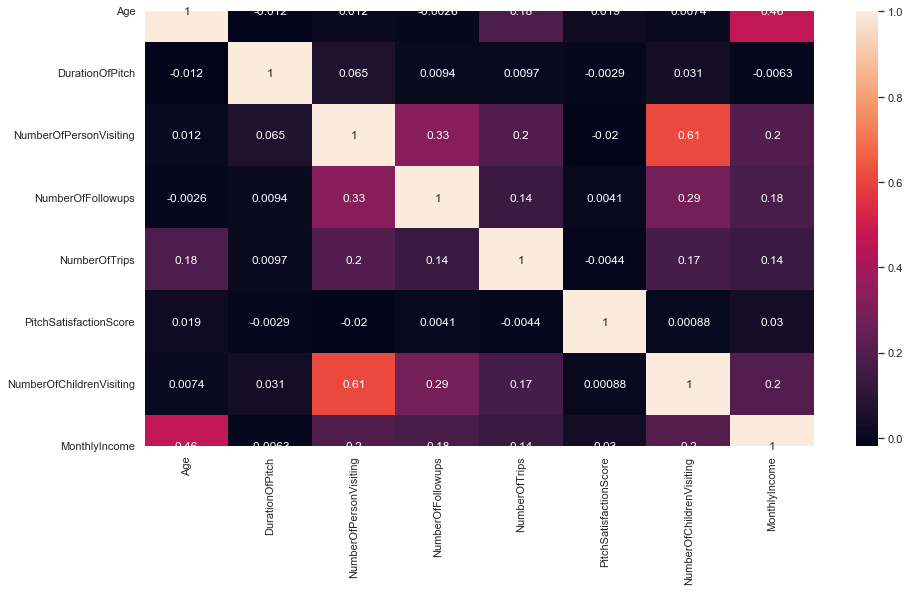

In [28]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,8))
sns.heatmap(df_Tour.corr(),annot=True)
plt.show()


In [29]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,8))
sns.pairplot(df_Tour, hue="ProdTaken", corner=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

In [30]:
## Function to plot distributions and boxplot of customers

def plot(x, target='ProdTaken'):
    fig, axs= plt.subplots(2,2, figsize=(12,10))
    axs[0,0].set_title(f"Disribution of {x} \n of a Customer who had Not Taken The Product", fontsize=14, fontweight="bold")
    sns.distplot(df_Tour[(df_Tour[target] ==0)][x],ax=axs[0,0], color="teal")
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight="bold")
    sns.distplot(df_Tour[(df_tour[target] == 1)][x],ax=axs[0,1],color="orange")
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight="bold")
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(df_Tour[target],df_Tour[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df_Tour[target],df_Tour[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

    
                       

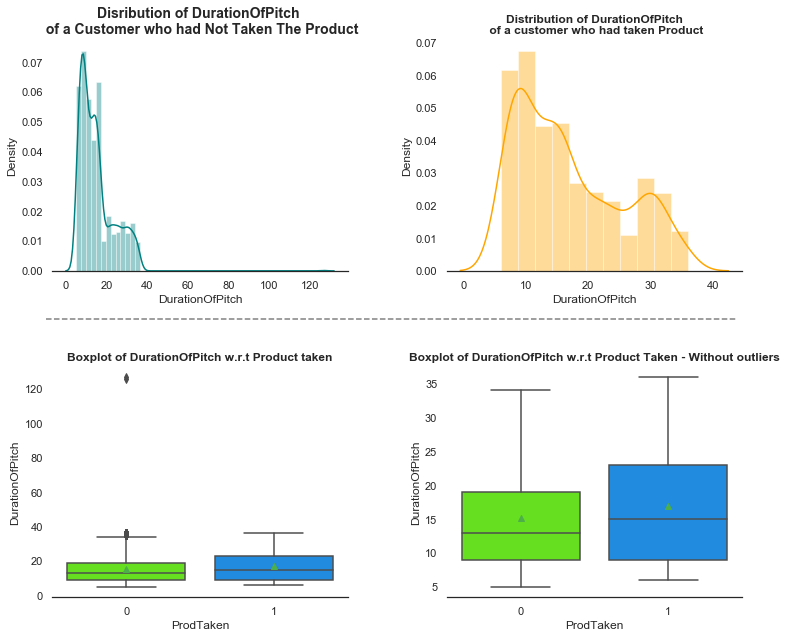

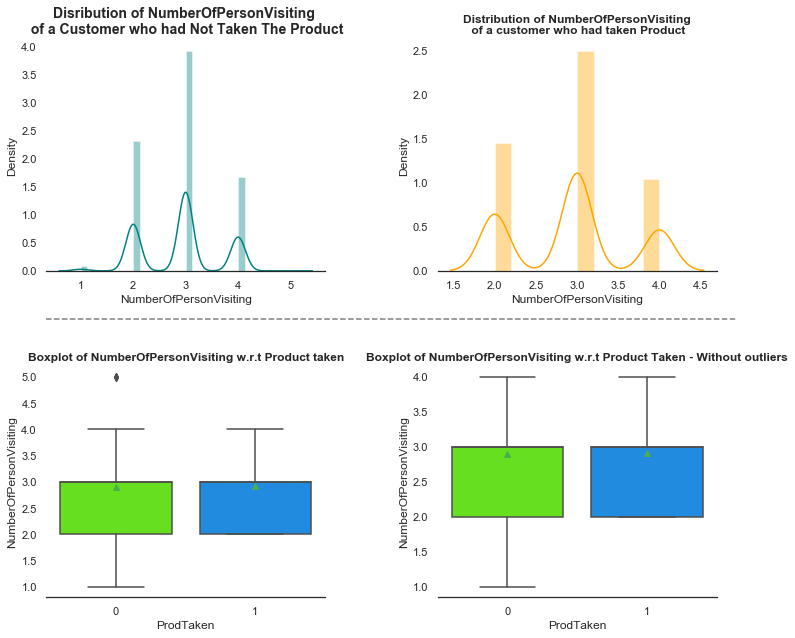

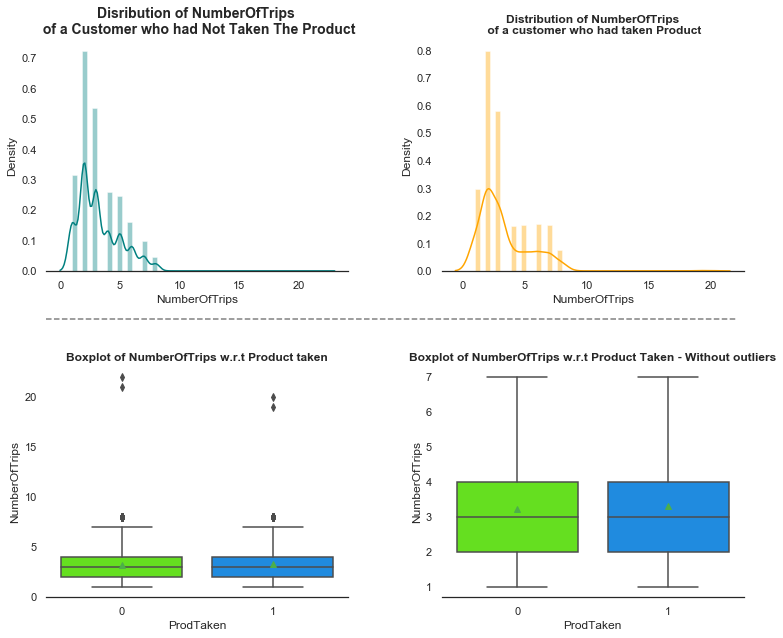

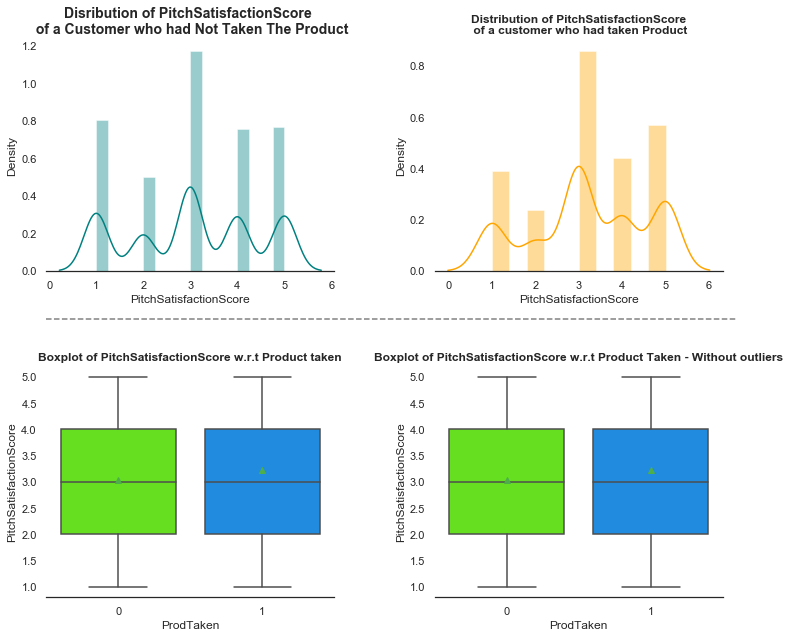

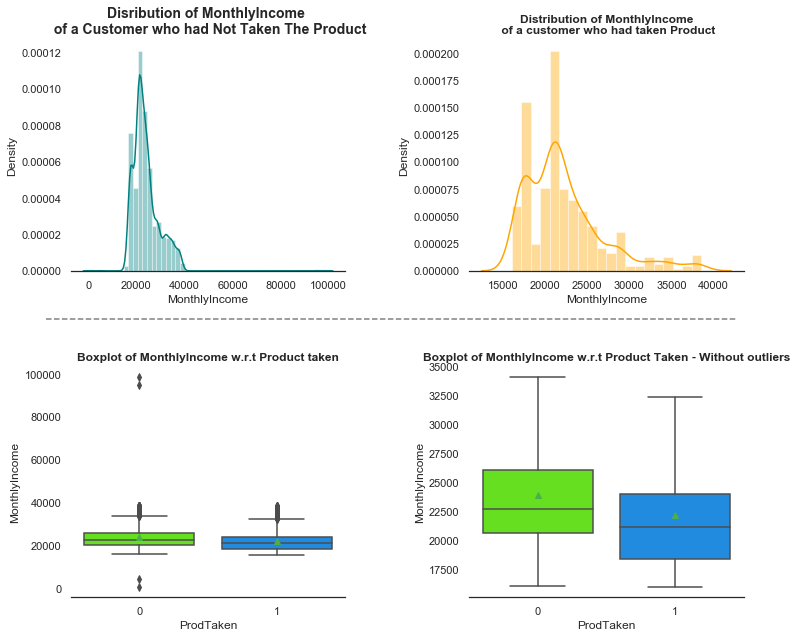

In [31]:
## select all quantitative columns and check the spread
list_col= df_Tour.select_dtypes(include='number').columns.to_list()
for j in range(len(list_col)):
    plot(list_col[j])

## . observations

#### ..most customers who purchased the product are between the ages of 28 to 40
#### .. the duration of pitch of most customers who took the product is between 8-22mins
#####  .. and surprisingly the duration of pitch of the outliers of those who not taken the product is 40-122mins
#### .. the number of people visiting the customer whom had taken the product are 2-4
#####  .. the number of people visiting has an outlier of 5 and still the product was not taken
#### .. the number of trips has an outlier of 17-20 trips
#### .. majority of those who have taken the product has an income  range of 19000-24000
##### ..but also have an outlier of 38000-100000 who had not taken the product

In [32]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Occupation',hue='ProdTaken',data=df_tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')


Text(0.5, 1.0, 'Monthly Income vs Occupation')

Text(0.5, 1.0, 'Monthly Income vs Designation')

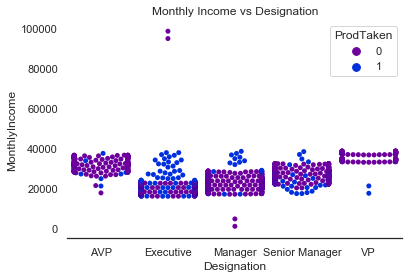

In [33]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Designation')


In [34]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Gender',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Gender')

Text(0.5, 1.0, 'Monthly Income vs Gender')

Text(0.5, 1.0, 'NumberOfTrips vs Designation')

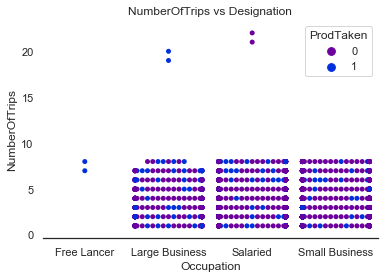

In [35]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='NumberOfTrips',x='Occupation',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('NumberOfTrips vs Designation')


In [36]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='NumberOfChildrenVisiting',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs NumberOfChildrenVisiting')


Text(0.5, 1.0, 'Monthly Income vs NumberOfChildrenVisiting')

Text(0.5, 1.0, 'Monthly Income vs Age Bin')

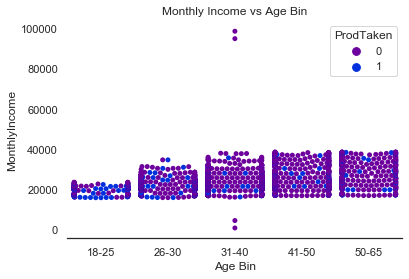

In [37]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Age Bin',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age Bin')

Text(0.5, 1.0, 'Monthly Income vs TypeOfContact')

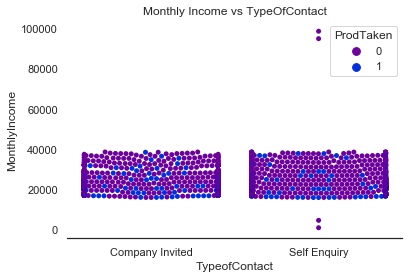

In [38]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='TypeofContact',hue='ProdTaken',data=df_Tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs TypeOfContact')

### observations
#### .. most customers who bought the product have salaries in the range of 18000-24000 and are aged 18-27
#### .. freelancers always accepted the product no matter the circumstances
#### .. Executives with income within the range of 21000-40000 accepted the product
#### .. Managers with income range of 38000-40000 bought the product
#### ..Senior Managers with income 20000-21000 bought the product


## ... Missing Value Treatment

In [32]:
df_Tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Age Bin                     240
IncomeBin                   233
dtype: int64

## .. Missing Value Treatment for Type Of Contact

In [39]:
df_Tour['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [40]:
df_Tour['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [41]:
## we fill the missing values in type of contact with 'Self Enquiry'
df_Tour['TypeofContact']= df_Tour['TypeofContact'].fillna('Self Enquiry')

In [42]:
## verify if there are  missing values 
df_Tour['TypeofContact'].isnull().sum()

0

## Missing value treatment for NumberOfFollowups
#### .. since followup has an outlier it would be best not to fill the missing values with mean instead we use median
#### .. there seems to be kind of a relationship between 'Gender', 'ProductPitched' and 'NumberOfFollowup' from our domain knowledge 
#### .. but if we are not sure we could use the statistical test chi square test and Cramer's V test

In [43]:
### lets create a function that finds the chi square value and the cramer's v value
def find_relationship(feature, target):
    Indep_Response_ct=pd.crosstab(index=df_Tour[feature], columns=df_Tour[target])
    Indep_Response_ct
    (chi2, p, dof,_)= stats.chi2_contingency([Indep_Response_ct.iloc[0].values, Indep_Response_ct.iloc[1].values])
    
    print("chi2_1 :", chi2)
    print("p-value :", p)
    print("Degree of freedom :", dof)
    print("Cramer V:", np.sqrt(chi2/(df_Tour.shape[0])))
    

In [38]:
find_relationship('Gender', 'NumberOfFollowups')

chi2_1 : 1.941893562186954
p-value : 0.8571253564444758
Degree of freedom : 5
Cramer V: 0.019931827153365427


In [46]:
find_relationship('ProductPitched', 'NumberOfFollowups')

chi2_1 : 0.3027485989970729
p-value : 0.9975910726021803
Degree of freedom : 5
Cramer V: 0.007870013410902226


### we know that if pvalue <=0.05 we rject the null hypothesis HO
### the null hypothesis assumes that there is no relationship between the independent variable and the dependent variable
### Cramer's V value show the strength of the relationship

In [47]:
df_Tour.groupby(['Gender', 'ProductPitched'])['NumberOfFollowups'].median()

df_Tour['NumberOfFollowups']=df_Tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))


In [48]:
## check if there are still missing values
df_Tour['NumberOfFollowups'].isnull().sum()

0

### . Missing value treatment for Monthly Income
#### .from our domain knowledge we know there is a relatonship  between 'Gender', 'Occupation', 'Designation' with 'MonthlyIncome'
#### . since monthly incomme has a lot of outliers we would use median to fill them

In [44]:
df_Tour.groupby(['Occupation', 'Designation', 'Gender'])['MonthlyIncome'].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female           nan
                                Male             nan
                Executive       Female           nan
                                Male     18929.00000
                Manager         Female           nan
                                Male             nan
                Senior Manager  Female           nan
                                Male             nan
                VP              Female           nan
                                Male             nan
Large Business  AVP             Female   31872.00000
                                Male     29959.00000
                Executive       Female   20748.00000
                                Male     20743.50000
                Manager         Female   22198.50000
                                Male     21997.00000
                Senior Manager  Female   28266.00000
                                Male     26838.50000
       

## Observation
##### .. from what we can see here female Executive and senior managers have a a higher salary than their male counterpart
##### this is thanks to the groupby mehtod
##### .. we can now fill the missing values present in income

In [45]:
df_Tour['MonthlyIncome'] = df_Tour.groupby(['Occupation', 'Designation','Gender'])['MonthlyIncome'].apply(lambda x:x.fillna(x.median()))

In [46]:
## check if there are still missing values
df_Tour['MonthlyIncome'].isnull().sum()

0

### .Missing value treatment for NumberOfTrips
#### .from our domain knowledge we can deduce that there's a relationship between 'Occupation', 'Designation', 'Gender' with 'NumberOfTrips'
#### .since Number Of Trips have outliers , therfore we fill the missing values with median

In [47]:
df_Tour.groupby(['Occupation', 'Designation', 'Gender'])['NumberOfTrips'].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female       nan
                                Male         nan
                Executive       Female       nan
                                Male     7.50000
                Manager         Female       nan
                                Male         nan
                Senior Manager  Female       nan
                                Male         nan
                VP              Female       nan
                                Male         nan
Large Business  AVP             Female   3.50000
                                Male     7.50000
                Executive       Female   3.00000
                                Male     2.50000
                Manager         Female   2.00000
                                Male     5.00000
                Senior Manager  Female   2.00000
                                Male     3.50000
                VP              Female   4.00000
                              

In [48]:
## fill the missing values in NumberOfTrips
df_Tour['NumberOfTrips']= df_Tour.groupby(['Occupation', 'Designation', 'Gender'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))

## check if there are still missing values
df_Tour['NumberOfTrips'].isnull().sum()

0

## Missing Value treatment for NumberOfChildrenVisiting
#### . from our domain Knowledge we know there is a strong relationship between 'Designation', 'MaritalStatus', 'Gender and 'NumberOfChildrenVisiting'
#### . we fill the nan values with median

In [49]:
df_Tour.groupby(['Designation','MaritalStatus','Gender'])['NumberOfChildrenVisiting'].median()

Designation     MaritalStatus  Gender
AVP             Divorced       Female   1.00000
                               Male     1.00000
                Married        Female   1.00000
                               Male     1.00000
                Single         Female   1.00000
                               Male     1.00000
                Unmarried      Female   1.00000
                               Male     2.00000
Executive       Divorced       Female   1.00000
                               Male     1.00000
                Married        Female   1.00000
                               Male     1.00000
                Single         Female   1.00000
                               Male     1.00000
                Unmarried      Female   2.00000
                               Male     2.00000
Manager         Divorced       Female   1.00000
                               Male     1.00000
                Married        Female   1.00000
                               Male     1.00000
  

In [50]:
## fill the nan values in NumberOfChildrenVisitng
df_Tour['NumberOfChildrenVisiting']= df_Tour.groupby(['Designation','MaritalStatus', 'Gender'])['NumberOfChildrenVisiting'].apply(lambda x:x.fillna(x.median()))

## check if there are still missing values
df_Tour['NumberOfChildrenVisiting'].isnull().sum()

0

## Missing value treatment for PreferredPropertyStar

 

In [51]:
## since we plan on filling missing data with the groupby method , we would have to convert the data types for preferred property star to float64
df_Tour['PreferredPropertyStar']=df_Tour['PreferredPropertyStar'].astype(float)

In [52]:
df_Tour.groupby(['Designation', 'MaritalStatus','Gender'])['PreferredPropertyStar'].median()

Designation     MaritalStatus  Gender
AVP             Divorced       Female   3.00000
                               Male     3.00000
                Married        Female   3.00000
                               Male     3.00000
                Single         Female   3.00000
                               Male     3.00000
                Unmarried      Female   4.00000
                               Male     5.00000
Executive       Divorced       Female   3.00000
                               Male     3.00000
                Married        Female   3.00000
                               Male     3.00000
                Single         Female   3.00000
                               Male     3.00000
                Unmarried      Female   3.00000
                               Male     3.00000
Manager         Divorced       Female   3.00000
                               Male     3.00000
                Married        Female   3.00000
                               Male     3.00000
  

In [53]:
##handling missinng values in PreferredPropertyStar
df_Tour['PreferredPropertyStar']= df_Tour.groupby([ 'Designation','MaritalStatus', 'Gender'])['PreferredPropertyStar'].apply(lambda x:x.fillna(x.median()))

## check if there are still missing values
df_tour['PreferredPropertyStar'].astype('category')

0      3.00000
1      4.00000
2      3.00000
3      3.00000
4      4.00000
         ...  
4883   4.00000
4884   3.00000
4885   4.00000
4886   3.00000
4887   4.00000
Name: PreferredPropertyStar, Length: 4888, dtype: category
Categories (3, float64): [3.00000, 4.00000, 5.00000]

In [54]:
df_Tour['PreferredPropertyStar'].isnull().sum()

0

## ..Handling Missing values in DurationOfPitch
#### .. from our domain knowledge we can tell there is a relationship between 'Designation', 'PreferredPropertyStar', 'Gender' with 'DurationOfPitch'
#### .. we fill the nan values with the median

In [55]:
df_Tour.groupby(['Designation', 'ProductPitched', 'Gender'])['DurationOfPitch'].median()

Designation     ProductPitched  Gender
AVP             Basic           Female        nan
                                Male          nan
                Deluxe          Female        nan
                                Male          nan
                King            Female        nan
                                Male          nan
                Standard        Female        nan
                                Male          nan
                Super Deluxe    Female   13.00000
                                Male     13.00000
Executive       Basic           Female   13.00000
                                Male     13.00000
                Deluxe          Female        nan
                                Male          nan
                King            Female        nan
                                Male          nan
                Standard        Female        nan
                                Male          nan
                Super Deluxe    Female        nan
           

In [56]:
## fill missing values in DurationOfPitch
df_Tour['DurationOfPitch']= df_Tour.groupby(['Designation','ProductPitched', 'Gender'])['DurationOfPitch'].apply(lambda x:x.fillna(x.median()))

## check if there are still missing values
df_Tour['DurationOfPitch'].isnull().sum()

0

In [57]:
df_Tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
df_Tour["Age"] = df_Tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

## check if there are still missing values
df_Tour["Age"].isnull().sum()


0

In [58]:
## to handle missing data in Age Bin we would group the Age again into group, but since Age is without missing values
### Age will no longer have missing value

df_Tour['Age Bin'] = pd.cut(df_Tour['Age'], bins = [16, 25, 31, 40, 50, 65], labels= ['16-25', '26-30', '31-40', '41-50', '51-65'])

## check if there are still missing values
df_Tour['Age Bin'].isnull().sum()


0

In [59]:
## to handle missing data in IncomeBin we would group the MonthlyIncome again into group, but since MonthlyIncome is without missing values
### IncomeBin will no longer have missing value

df_Tour['IncomeBin'] = pd.cut(df_Tour['MonthlyIncome'], bins =[0,15000,20000,25000,30000,35000,40000,100000], labels= ['<15000', '<20000', '<25000', '<30000', '<35000', '<40000','<100000'])

## check if there are still missing values
df_Tour['IncomeBin'].isnull().sum()


0

In [60]:
df_Tour.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
Age Bin                      0
IncomeBin                    0
dtype: int64

## Customer Profile by Product Type
#
#### we would like to see the relationship between Product taken and all other features

In [61]:
cust_prof=df_Tour[df_Tour['ProdTaken']==1]


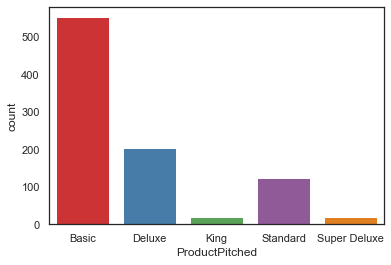

<Figure size 792x576 with 0 Axes>

In [62]:
sns.countplot(x="ProductPitched", data=cust_prof)
plt.figure(figsize=(11,8))
sns.despine(top=True,right=True,left=True) # to remove side line from graph


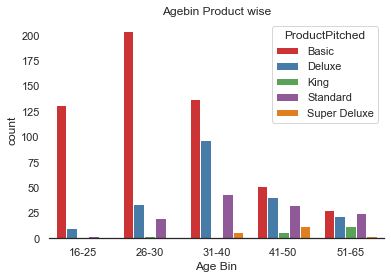

In [63]:
sns.countplot(x='Age Bin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')

sns.despine(top=True,right=True,left=True) # to remove side line from graph


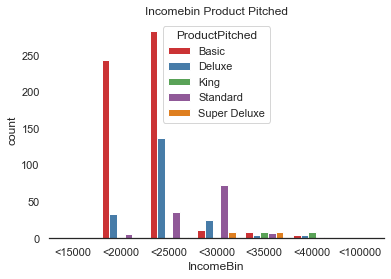

In [64]:
sns.countplot(x='IncomeBin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
##
sns.despine(top=True,right=True,left=True) # to remove side line from graph


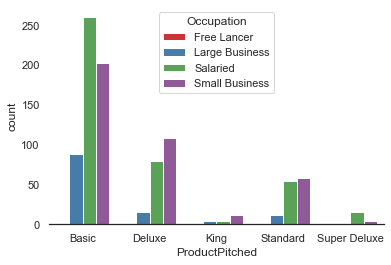

In [65]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


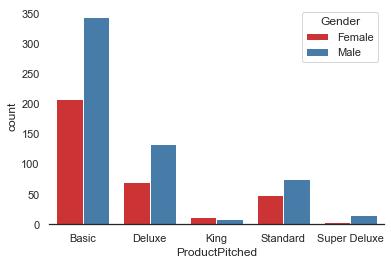

In [66]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


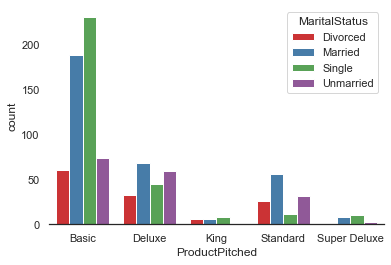

In [67]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


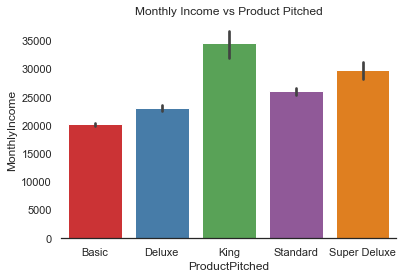

In [68]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph


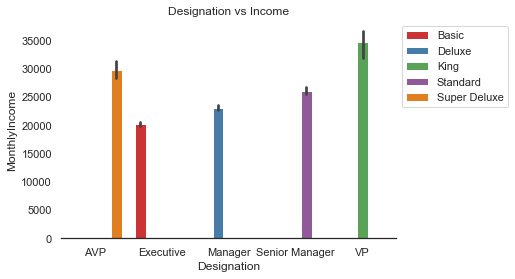

In [69]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))


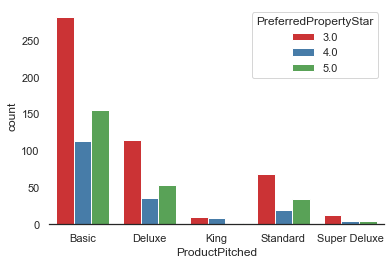

In [70]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


In [71]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


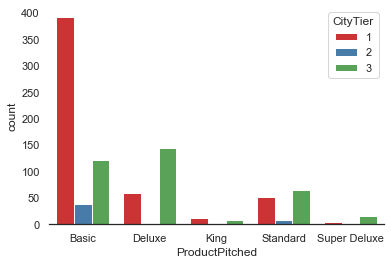

In [72]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")
sns.despine(top=True,right=True,left=True) # to remove side line from graph


In [73]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [74]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,df_tour['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_tour['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(9,5))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()


ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


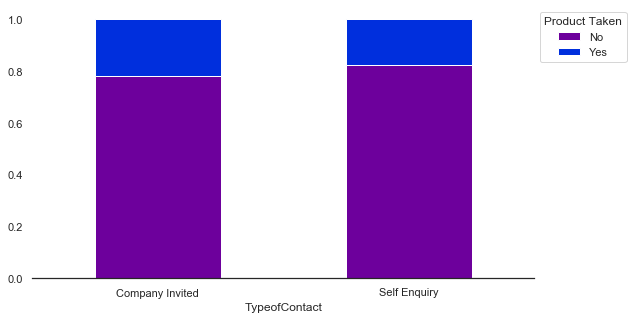

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


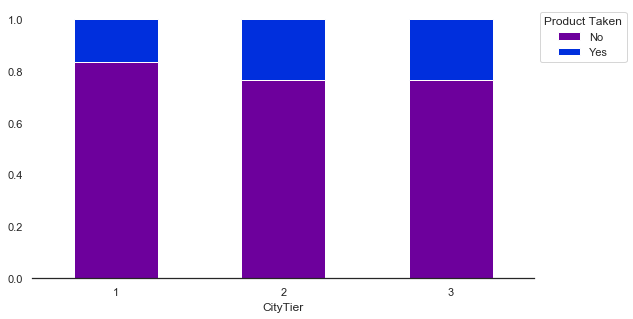

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


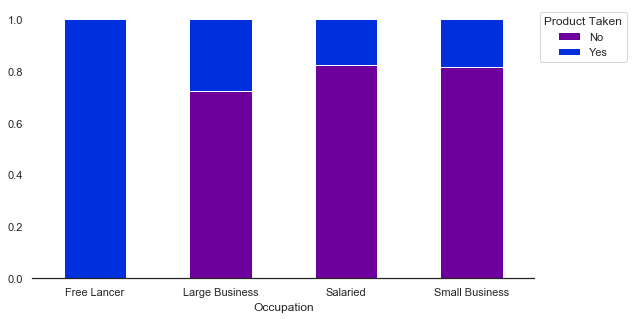

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


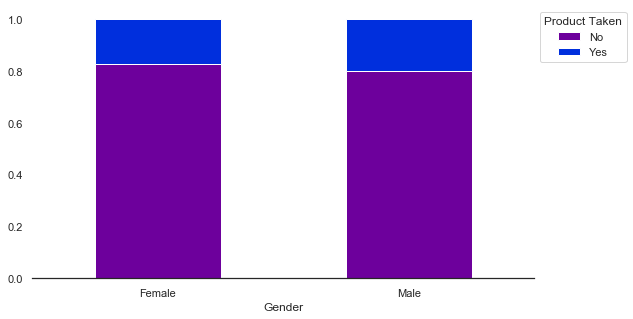

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


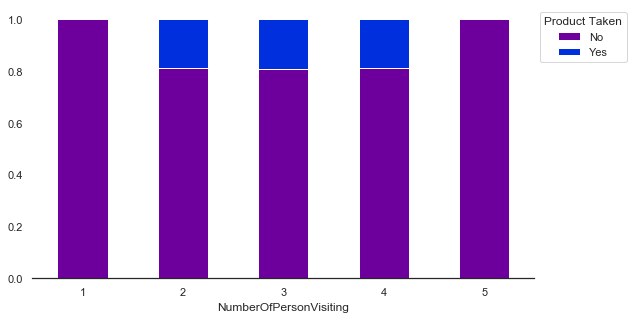

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


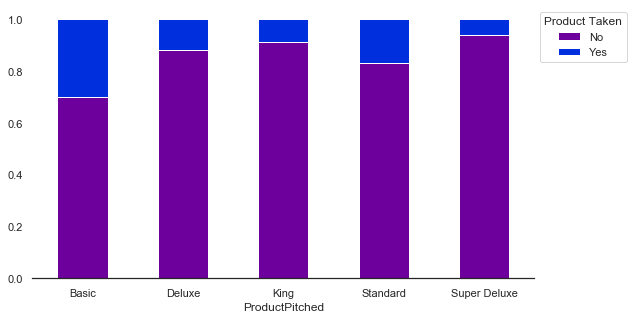

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2529  488  3017
4.0                     731  182   913
4.5                       2    0     2
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1191  300  1491
3.0             902  225  1127
3.5              28    2    30
4.0             451   62   513
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


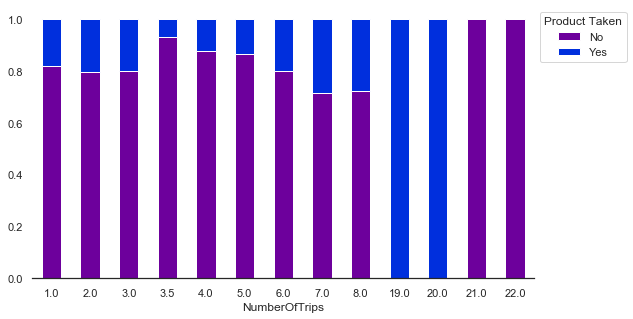

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


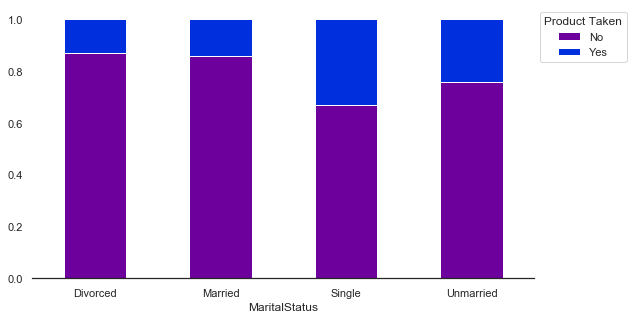

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


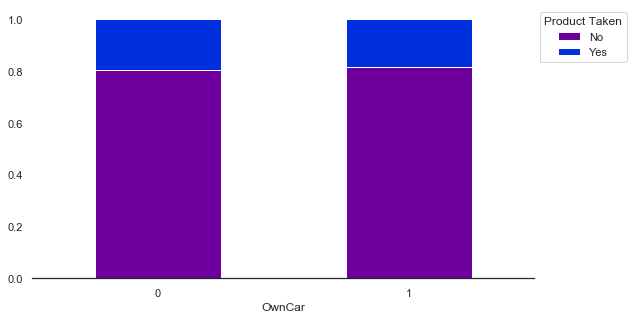

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken     0    1   All
Age Bin                   
16-25       204  143   347
26-30       765  260  1025
31-40      1610  284  1894
41-50       929  144  1073
51-65       460   89   549
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken     0    1   All
IncomeBin                 
<15000        2    0     2
<20000      754  284  1038
<25000     2031  459  2490
<30000      651  117   768
<35000      343   39   382
<40000      185   21   206
<100000       2    0     2
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


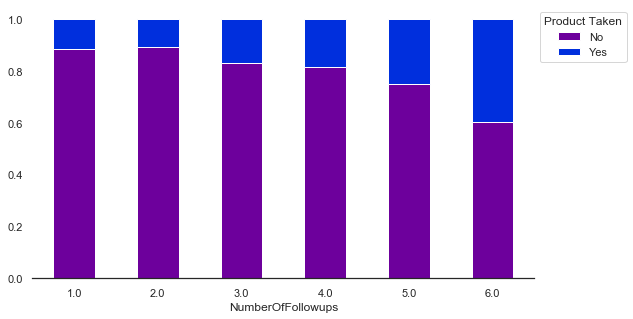

In [75]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Age Bin','IncomeBin','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(df_Tour[variable])


## Customer profile according to product pitched and product purchased

#### Basic: the Age group of those who bought the product is 16-25, male customers purchased the product more than their female counterpartMarried or Single Male Executive of Large and small buisnesses who lives in city tier 1  preferred the package.
#### Deluxe: Age group of customers who bought the product is 31-41, Unmarried and Married Male Managers of small buisness who are either salaried,with an income <25000, live in city tier 3 and prefers property star 4 bought the product
#### King:   Most of the customer have Monthly income in range of 30000-35000, age range in 51-60, Designation as VP. Belong to city tier 1 and are single female and Occupation is small business.Females buy this package more than men.
#### SuperDeluxe : Most of the customer have Monthly income < 35000, Age is in range 41-50, Designation as AVP, belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them were company invited
#### Standard package: Most of the customer have Monthly income <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.





## Insights based on EDA
####  .Mostly customer visting with 2,3,4 travellers purchased the product
####  .Customers who were pitched basic package mostly brought the product , followed by standard. Reason might be its less expensive.
####  .Mostly Customers who had passport bought the product.
####  .Most of the customers who bought the product were Executive and Senior manager
####  .Customers who were followed up 6 times had purchases the product
####  .Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier 2,3.
####  .Customer from 18-25 age purchased the product taken, followed by 26-30.
####  .Customers who learn from 15000-20000 purchased product followed by customers in income range 20000-25000.
####  .FreeLancers(need more data to conclude) and Large Business owners have higher chance of purchasing the travel package
####  .Single and unmarried people has higher chance of purchasing the travel package.
####  .Having a passport increased chances of purchasing the package.
####  .Customers who took 7/8 trips had higher chances of purchaing the packages
####  .Gender,number of children visiting, having a car seemed to be insignificant.
####  .Customers mostly purchased the travel package when marketing team did high number of followups,higher duration of pitch , and pitched Basic product.


### Outlier Detection

In [76]:
## to find the 25th percentile
Q1= df_Tour.quantile(0.25)

## to find the 75th percentile
Q3= df_Tour.quantile(0.75)

## Interquantile range
IQR= Q3-Q1

## to find the lower bound 
lower = Q1 - 1.5*IQR

## to find the upper bound 
upper =Q3 + 1.5*IQR

In [77]:
## this code will find all the outliers present in numerical columns and convert them to percentage
((df_tour.select_dtypes(include=['float64','int64'])<lower) 
 | (df_tour.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_tour)*100


Age                        0.00000
CityTier                   0.00000
CustomerID                 0.00000
DurationOfPitch            2.29133
MonthlyIncome              7.52864
NumberOfChildrenVisiting   0.00000
NumberOfFollowups          6.38298
NumberOfPersonVisiting     0.06137
NumberOfTrips              2.22995
OwnCar                     0.00000
Passport                   0.00000
PitchSatisfactionScore     0.00000
PreferredPropertyStar      0.00000
ProdTaken                  0.00000
dtype: float64

### Observation 

### .. from our observations we can see that "DurationOfPitch", "MonthlyIncome", "NumberOfFollowups", "NumberOfPersonVisiting","NumberOfTrips"

In [78]:
#### check MonthlyIncome outliers and see if it has any effect on ProdTaken

In [79]:
df_Tour.sort_values(by=['MonthlyIncome'], ascending=False).head(5)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch Occupation  \
2482         0 37.00000     Self Enquiry        1         12.00000   Salaried   
38           0 36.00000     Self Enquiry        1         11.00000   Salaried   
2634         0 53.00000     Self Enquiry        1          7.00000   Salaried   
4104         0 53.00000     Self Enquiry        1          7.00000   Salaried   
3190         0 42.00000  Company Invited        1         14.00000   Salaried   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  ...  \
2482  Female                       3            5.00000          Basic  ...   
38    Female                       2            4.00000          Basic  ...   
2634    Male                       4            5.00000           King  ...   
4104    Male                       4            5.00000           King  ...   
3190  Female                       3            6.00000           King  ...   

      MaritalStatus NumberOfTrips  Passport PitchSatisfactionScore  OwnCar  \
2482       Divorced       2.00000         1                      2       1   
38         Divorced       1.00000         1                      2       1   
2634       Divorced       2.00000         0                      2       1   
4104        Married       2.00000         0                      1       1   
3190        Married       3.00000         0                      4       1   

     NumberOfChildrenVisiting  Designation MonthlyIncome  Age Bin IncomeBin  
2482                  1.00000    Executive   98678.00000    31-40   <100000  
38                    0.00000    Executive   95000.00000    31-40   <100000  
2634                  2.00000           VP   38677.00000    51-65    <40000  
4104                  3.00000           VP   38677.00000    51-65    <40000  
3190                  1.00000           VP   38651.00000    41-50    <40000  

[5 rows x 21 columns]

In [80]:
df_Tour.sort_values(by=['MonthlyIncome'], ascending=True).head(5)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch  \
142          0 38.00000     Self Enquiry        1          9.00000   
2586         0 39.00000     Self Enquiry        1         10.00000   
1983         1 20.00000     Self Enquiry        1         16.00000   
513          1 20.00000     Self Enquiry        1         16.00000   
727          0 18.00000  Company Invited        1         11.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
142   Large Business  Female                       2            3.00000   
2586  Large Business  Female                       3            4.00000   
1983  Small Business    Male                       2            3.00000   
513   Small Business    Male                       2            3.00000   
727         Salaried    Male                       3            3.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
142          Deluxe  ...         Single       4.00000         1   
2586         Deluxe  ...         Single       5.00000         1   
1983          Basic  ...         Single       2.00000         1   
513           Basic  ...         Single       2.00000         1   
727           Basic  ...         Single       2.00000         0   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting  Designation  \
142                       5       0                  0.00000      Manager   
2586                      5       0                  1.00000      Manager   
1983                      5       1                  1.00000    Executive   
513                       5       0                  0.00000    Executive   
727                       2       1                  1.00000    Executive   

     MonthlyIncome  Age Bin IncomeBin  
142     1000.00000    31-40    <15000  
2586    4678.00000    31-40    <15000  
1983   16009.00000    16-25    <20000  
513    16009.00000    16-25    <20000  
727    16051.00000    16-25    <20000  

[5 rows x 21 columns]

####  check NumberOfTrips outliers and see if it has any effect on ProdTaken

In [81]:
df_Tour.sort_values(by=['NumberOfTrips'], ascending=False).head(6)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch  \
3260         0 40.00000  Company Invited        1         16.00000   
816          0 39.00000  Company Invited        1         15.00000   
2829         1 31.00000  Company Invited        1         11.00000   
385          1 30.00000  Company Invited        1         10.00000   
4161         0 35.00000     Self Enquiry        1          9.00000   
4840         1 44.00000  Company Invited        1          9.00000   

          Occupation Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3260        Salaried   Male                       4            4.00000   
816         Salaried   Male                       3            3.00000   
2829  Large Business   Male                       3            4.00000   
385   Large Business   Male                       2            3.00000   
4161        Salaried   Male                       3            5.00000   
4840        Salaried   Male                       4            4.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
3260         Deluxe  ...      Unmarried      22.00000         0   
816          Deluxe  ...      Unmarried      21.00000         0   
2829          Basic  ...         Single      20.00000         1   
385           Basic  ...         Single      19.00000         1   
4161         Deluxe  ...        Married       8.00000         0   
4840          Basic  ...        Married       8.00000         1   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting  Designation  \
3260                      2       1                  1.00000      Manager   
816                       2       1                  0.00000      Manager   
2829                      4       1                  2.00000    Executive   
385                       4       1                  1.00000    Executive   
4161                      4       0                  2.00000      Manager   
4840                      3       0                  1.00000    Executive   

     MonthlyIncome  Age Bin IncomeBin  
3260   25460.00000    31-40    <30000  
816    21782.00000    31-40    <25000  
2829   20963.00000    26-30    <25000  
385    17285.00000    26-30    <20000  
4161   24635.00000    31-40    <25000  
4840   28909.00000    41-50    <30000  

[6 rows x 21 columns]

In [82]:
df_Tour.sort_values(by=['DurationOfPitch'], ascending=False).head(3)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch  \
3878         0 53.00000  Company Invited        3        127.00000   
1434         0 32.00000  Company Invited        3        126.00000   
3718         0 32.00000     Self Enquiry        3         36.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3878        Salaried    Male                       3            4.00000   
1434        Salaried    Male                       2            3.00000   
3718  Small Business  Female                       4            5.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
3878          Basic  ...        Married       4.00000         0   
1434          Basic  ...        Married       3.00000         0   
3718         Deluxe  ...        Married       3.00000         0   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting  Designation  \
3878                      1       1                  2.00000    Executive   
1434                      1       1                  1.00000    Executive   
3718                      3       1                  1.00000      Manager   

     MonthlyIncome  Age Bin IncomeBin  
3878   22160.00000    51-65    <25000  
1434   18482.00000    31-40    <20000  
3718   24146.00000    31-40    <25000  

[3 rows x 21 columns]

In [83]:
df_Tour.sort_values(by=['NumberOfFollowups'], ascending=False).head(5)

ProdTaken      Age TypeofContact CityTier  DurationOfPitch  \
3874         0 39.00000  Self Enquiry        1         17.00000   
4350         1 34.00000  Self Enquiry        1         17.00000   
3293         1 44.00000  Self Enquiry        3         16.00000   
2907         1 27.00000  Self Enquiry        1         31.00000   
2529         0 57.00000  Self Enquiry        1         14.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3874  Small Business  Female                       3            6.00000   
4350  Small Business    Male                       3            6.00000   
3293  Small Business  Female                       3            6.00000   
2907  Large Business    Male                       4            6.00000   
2529        Salaried    Male                       3            6.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
3874       Standard  ...        Married       5.00000         0   
4350          Basic  ...        Married       2.00000         0   
3293         Deluxe  ...      Unmarried       2.00000         0   
2907          Basic  ...         Single       3.00000         1   
2529       Standard  ...      Unmarried       6.00000         0   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting     Designation  \
3874                      1       1                  2.00000  Senior Manager   
4350                      5       0                  1.00000       Executive   
3293                      2       1                  2.00000         Manager   
2907                      3       1                  3.00000       Executive   
2529                      2       0                  1.00000  Senior Manager   

     MonthlyIncome  Age Bin IncomeBin  
3874   31884.00000    31-40    <35000  
4350   22086.00000    31-40    <25000  
3293   24024.00000    41-50    <25000  
2907   21018.00000    26-30    <25000  
2529   25938.00000    51-65    <30000  

[5 rows x 21 columns]

In [84]:
df_Tour.sort_values(by=['NumberOfPersonVisiting'], ascending=True).head(5)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch  \
1399         0 43.00000     Self Enquiry        1         17.00000   
337          0 30.00000     Self Enquiry        1         15.00000   
338          0 30.00000     Self Enquiry        3         11.00000   
1979         0 33.00000  Company Invited        1         12.00000   
112          0 54.00000  Company Invited        2         32.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
1399        Salaried    Male                       1            3.00000   
337         Salaried    Male                       1            4.00000   
338   Small Business  Female                       1            4.00000   
1979        Salaried    Male                       1            3.00000   
112         Salaried  Female                       1            2.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
1399       Standard  ...        Married       2.00000         0   
337           Basic  ...         Single       1.00000         0   
338          Deluxe  ...        Married       2.00000         0   
1979         Deluxe  ...        Married       4.00000         0   
112    Super Deluxe  ...         Single       3.00000         1   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting     Designation  \
1399                      1       1                  0.00000  Senior Manager   
337                       2       1                  0.00000       Executive   
338                       2       0                  0.00000         Manager   
1979                      5       1                  0.00000         Manager   
112                       3       1                  0.00000             AVP   

     MonthlyIncome  Age Bin IncomeBin  
1399   22510.00000    41-50    <25000  
337    20371.50000    26-30    <25000  
338    21118.00000    26-30    <25000  
1979   22725.00000    31-40    <25000  
112    32328.00000    51-65    <35000  

[5 rows x 21 columns]

In [85]:
df_Tour.sort_values(by=['NumberOfPersonVisiting'], ascending=False).head(5)

ProdTaken      Age    TypeofContact CityTier  DurationOfPitch  \
3977         0 60.00000     Self Enquiry        3         32.00000   
4002         0 31.00000     Self Enquiry        1          9.00000   
4105         0 28.00000     Self Enquiry        1         16.00000   
3275         1 32.00000  Company Invited        1         22.00000   
3266         0 35.00000  Company Invited        1          9.00000   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3977        Salaried  Female                       5            4.00000   
4002        Salaried    Male                       5            5.00000   
4105  Small Business  Female                       5            4.00000   
3275  Small Business    Male                       4            4.00000   
3266        Salaried    Male                       4            4.00000   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
3977       Standard  ...      Unmarried       2.00000         0   
4002         Deluxe  ...        Married       3.00000         0   
4105          Basic  ...         Single       3.00000         0   
3275          Basic  ...       Divorced       3.00000         0   
3266         Deluxe  ...      Unmarried       4.00000         0   

     PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting     Designation  \
3977                      3       1                  2.00000  Senior Manager   
4002                      4       1                  2.00000         Manager   
4105                      3       0                  2.00000       Executive   
3275                      4       1                  3.00000       Executive   
3266                      4       1                  3.00000         Manager   

     MonthlyIncome  Age Bin IncomeBin  
3977   26315.00000    51-65    <30000  
4002   22830.00000    26-30    <25000  
4105   20957.00000    26-30    <25000  
3275   21288.00000    31-40    <25000  
3266   22711.00000    31-40    <25000  

[5 rows x 21 columns]

## Observations

### income greater than 40000 and income less than 10000 have showed to have no effect on ProdTaken
### NumberOfPerson visiting greater than 4 also have shown that it has no effect on ProdTaken
###  Customers who took NumberOfTrips greater than 20 did not take the product
###  Customers  whom were pitched the product for more than 37 mins on the  product did not buy the product
### therefore we are removing these outliers from MonthlyIncome, NumberOfPersonVisiting, NumberOfTrips, DurationOfPitch
### but since the algorithm we plan on using are tree based algorithm which are insesitive to outliers, we may decide not to remove them

In [86]:
## drop columns which have NumberOfPersonVisiting to be greater than 4
df_Tour.drop(index=df_Tour[df_Tour.NumberOfPersonVisiting>4].index, inplace=True)

## drop columns which have NumberOfTrips taking to be greater than 20
df_Tour.drop(index=df_Tour[df_Tour.NumberOfTrips>20].index, inplace=True)

## drop columns that have monthly income greater than 40000 and less than 10000
df_Tour.drop(index=df_Tour[(df_Tour.MonthlyIncome>40000) | (df_tour.MonthlyIncome<10000)].index,inplace=True)

## drop columns with duration of pitch greater than 37 mins
df_Tour.drop(index=df_Tour[df_Tour.DurationOfPitch>37].index,inplace=True)




###  Split the dataset
#### Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
#### For that we will use the stratify parameter in the train_test_split function.
#### Since customer interaction data will not be available for potential customers who will purchase newly introduced travel package ,so we will drop those variables from our data for modelling.


In [87]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4877 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4877 non-null   category
 1   Age                       4877 non-null   float64 
 2   TypeofContact             4877 non-null   category
 3   CityTier                  4877 non-null   category
 4   DurationOfPitch           4877 non-null   float64 
 5   Occupation                4877 non-null   category
 6   Gender                    4877 non-null   category
 7   NumberOfPersonVisiting    4877 non-null   int64   
 8   NumberOfFollowups         4832 non-null   float64 
 9   ProductPitched            4877 non-null   category
 10  PreferredPropertyStar     4877 non-null   float64 
 11  MaritalStatus             4877 non-null   category
 12  NumberOfTrips             4877 non-null   float64 
 13  Passport                  4877 non-null   catego

##### Based on the information provided, i assume that Customer interaction data will not be available for new and potiental customers so dropping columns related to customer interaction



In [88]:
# Separating target column
X = df_Tour.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Age Bin','IncomeBin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df_Tour['ProdTaken']



In [89]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape


((3413, 22), (1464, 22))

In [90]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()


In [91]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores


In [92]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of model to list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])


### Model Building

##### .The Travel company"s objectives are:

##### 1. Make Marketing Expenditure more efficient and focused on the customers that would actually purchase the product.
##### 2. Predict and Identify all potential customers who will purchase the newly introduced travel package.
####  Metric for Optimization:

##### For the above objectives, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized. The greater the F1-Score, greater the chances of predicting both classes correctly.

##### We will build following models, tune them and compare the outcome of all the models:

##### 1. Decision Tree model.
##### 2. Bagging Classifier.
##### 3. Random Forest Classifier.
##### 4. ADABoost.
##### 5. GradientBoost.
##### 6. XG Boost.
##### 7.Stacking Classifier.


In [93]:
### DecisionTreeClassifier with gini and Class_Weight for appropriate importance
dtree= DecisionTreeClassifier(criterion="gini", class_weight={0:0.15, 1:0.85}, random_state=1)

### fit the model on the training dataset
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          1.00000        0.86066       1.00000      0.56884   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.64876         1.00000        0.60618

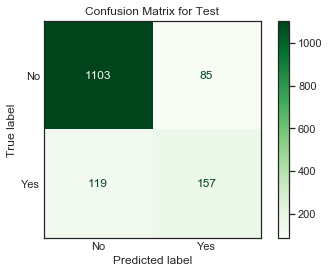

In [94]:
dtree_score= get_metrics_score(dtree, X_train, X_test, y_train, y_test)
add_score_model(dtree_score)

In [96]:
### Observation
### the decision tree classifier seems to be overfitting the training data, f1 score is aslo averagely high

### Bagging Classifier

In [97]:
### fitting the model
bagging_classifier= BaggingClassifier(random_state=1, verbose=1)

bagging_classifier.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99180        0.90027       0.95652      0.55435   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.86932         0.97778        0.67699

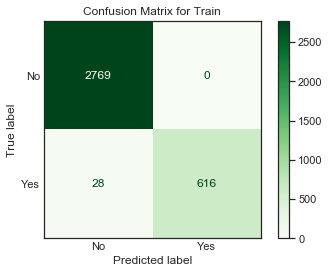

In [98]:
bagging_score= get_metrics_score(bagging_classifier, X_train, X_test, y_train, y_test)

add_score_model(bagging_score)

### observation
### bagging classifier has made some improvement in its test accuracy and f1 score than that of decision tree classifier

### Random Forest Classifier

In [99]:
Rf= RandomForestClassifier(random_state=1)
Rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          1.00000        0.89481       1.00000      0.50725   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.88608         1.00000        0.64516

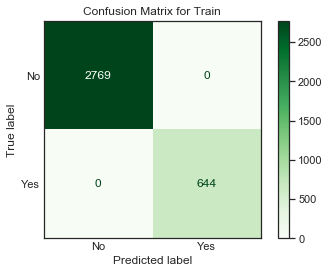

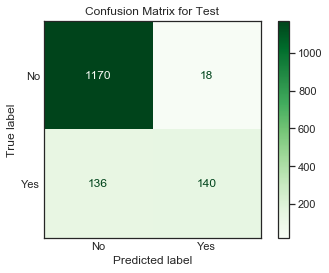

In [100]:
Rf_score =get_metrics_score(Rf, X_train, X_test, y_train, y_test)
add_score_model(Rf_score)

## observation
###  Random forest Classifier  is overfiting the train data, but it performs better than Decision tree classifier

###  Model Performance Evaluation and Bagging Improvement

In [101]:
comparison_frame= pd.DataFrame({'Model': ['Decision Tree','Bagging Classifer',
                                         'Random Forest'], 'Train_Accuracy':acc_train,
'Test_Accuracy':acc_test, 'Train_Recall':recall_train, 'Test_Recall':recall_test,
'Train_Precision':precision_train, 'Test_Precision':precision_test, 'Train_F1':f1_train,
'Test_F1':f1_test})

## Sorting models in decreasing order of f1_test
comparison_frame.sort_values(by='Test_F1', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
1  Bagging Classifer         0.99180        0.90027       0.95652   
2      Random Forest         1.00000        0.89481       1.00000   
0      Decision Tree         1.00000        0.86066       1.00000   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
1      0.55435          1.00000         0.86932   0.97778  0.67699  
2      0.50725          1.00000         0.88608   1.00000  0.64516  
0      0.56884          1.00000         0.64876   1.00000  0.60618

### Tuning decision tree

In [102]:
dtree_tuned  = DecisionTreeClassifier(class_weight={0:0.15, 1:0.85}, random_state=1)

## defining the hyperparameters
parameters={'max_depth':[1,4,7,15],
            'criterion':['gini', 'entropy'],
            'min_samples_leaf':[2,3,5,7,11],
            'max_leaf_nodes':[3,5,7,10,15]
           }

## type of scoring to be used to compare parameter combination
scorer= metrics.make_scorer(metrics.f1_score)

## Run the grid search
grid_obj= GridSearchCV(dtree_tuned,parameters, scoring=scorer, n_jobs=-1, cv=5 )

grid_obj= grid_obj.fit(X_train, y_train)

## set to the best combination of parameters
dtree_tunned =grid_obj.best_estimator_

## fit the best estimator to the data
dtree_tunned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=7,
                       max_leaf_nodes=10, min_samples_leaf=2, random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.76297        0.76366       0.66460      0.66304   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.41920         0.41972         0.51411        0.51404

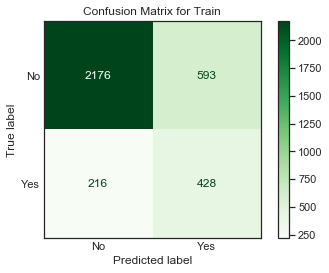

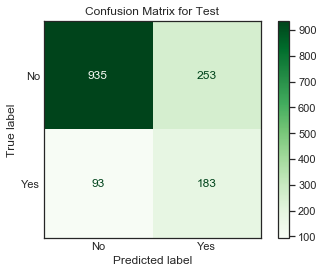

In [103]:
score_tuned_dt=get_metrics_score(dtree_tunned,X_train,X_test,y_train,y_test)
add_score_model(score_tuned_dt) # add score to dataframe


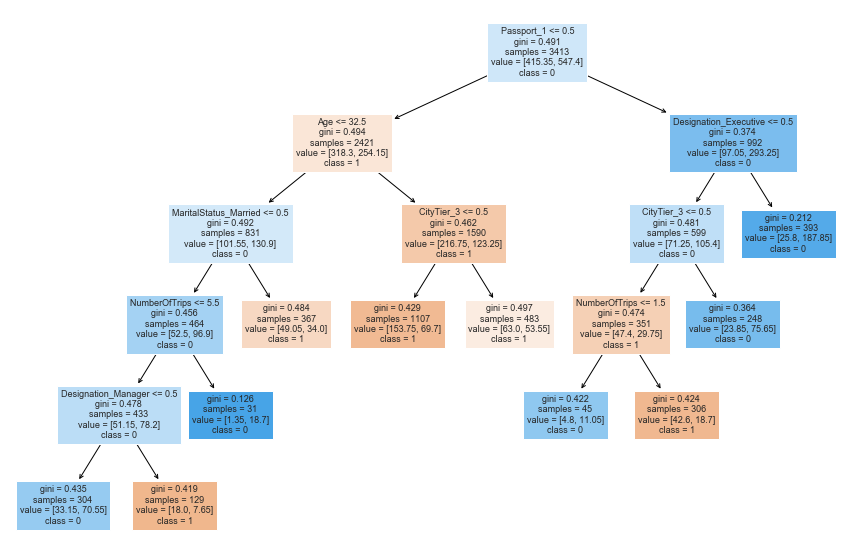

In [104]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tunned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [105]:
feature_names =X_train.columns
importance= dtree_tunned.feature_importances_
indices=np.argsort(importance)
print (pd.DataFrame(dtree_tunned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
Passport_1                 0.41500
CityTier_3                 0.14703
Designation_Executive      0.14615
Age                        0.10519
NumberOfTrips              0.07202
MaritalStatus_Married      0.05781
Designation_Manager        0.05682
Gender_Male                0.00000
Designation_Senior Manager 0.00000
OwnCar_1                   0.00000
MaritalStatus_Unmarried    0.00000
MaritalStatus_Single       0.00000
Occupation_Small Business  0.00000
NumberOfPersonVisiting     0.00000
Occupation_Salaried        0.00000
Occupation_Large Business  0.00000
CityTier_2                 0.00000
TypeofContact_Self Enquiry 0.00000
MonthlyIncome              0.00000
NumberOfChildrenVisiting   0.00000
PreferredPropertyStar      0.00000
Designation_VP             0.00000


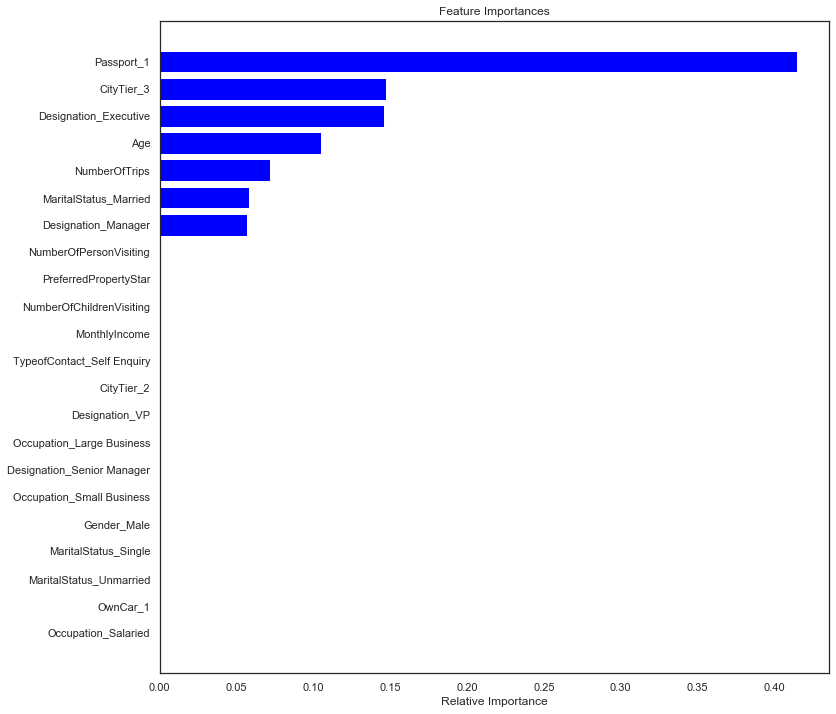

In [106]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


###  Observations

##### 1. f1_score has reduced significantly from 0.6 to 0.51
##### 2. the most important features are Passport_1 and cityTier_3

#### Tuning Random Forest

In [107]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto',0.2, 0.7,'log2'],
                "max_samples": np.arange(0.3,0.5, 0.7, None)
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=15,
                       max_samples=0.3, min_samples_leaf=5, n_estimators=500,
                       random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.86288        0.83880       0.72826      0.63406   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.61549         0.56452         0.66714        0.59727

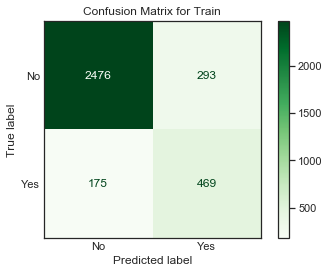

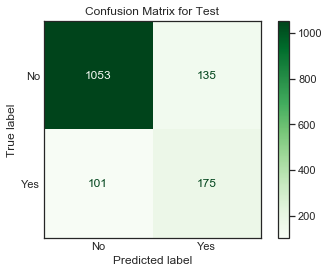

In [108]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 


In [109]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
MonthlyIncome              0.15448
Age                        0.14806
Passport_1                 0.13118
NumberOfTrips              0.06952
Designation_Executive      0.05697
PreferredPropertyStar      0.05000
CityTier_3                 0.04417
NumberOfChildrenVisiting   0.03600
MaritalStatus_Married      0.03368
NumberOfPersonVisiting     0.03325
Designation_Manager        0.03014
MaritalStatus_Single       0.02973
Gender_Male                0.02800
OwnCar_1                   0.02523
TypeofContact_Self Enquiry 0.02506
Occupation_Salaried        0.02325
Occupation_Small Business  0.02215
MaritalStatus_Unmarried    0.01982
Designation_Senior Manager 0.01612
Occupation_Large Business  0.01150
Designation_VP             0.00657
CityTier_2                 0.00514


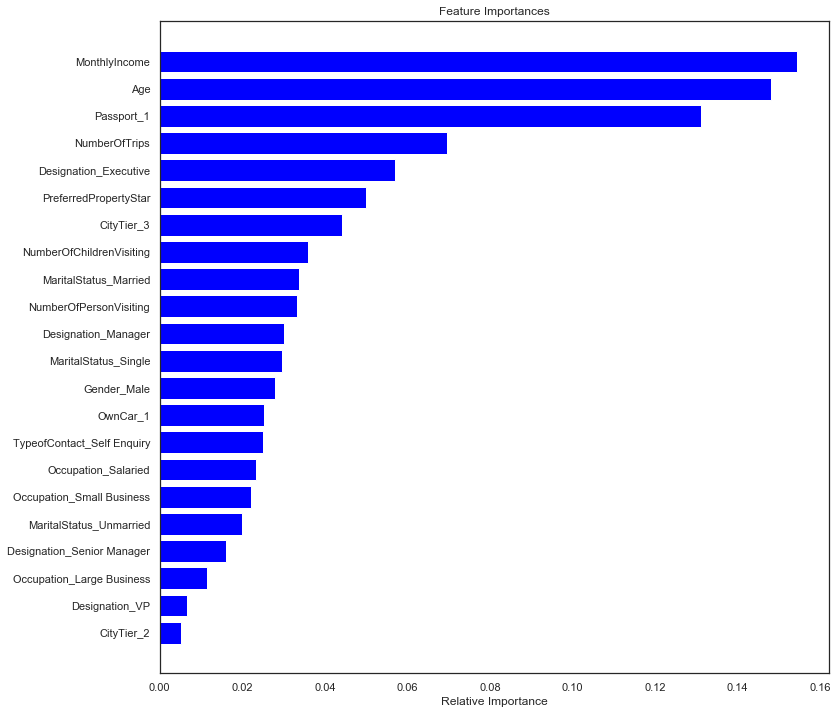

In [110]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [111]:
### observations
#### 1. the f1_score has reduced from 0.64 to 0.58
#### 2. the important features are Passport_1 , age and monthly income
#### 3. the model is not overfitted

### Tuned Bagging Classifier

In [112]:
# set the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

# assigning Bootstrap = True to select features with Replacement
bgc1 = BaggingClassifier(random_state=1,bootstrap=True)

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bgc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
bgcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
bgcht.fit(X_train, y_train)


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=40,
                  random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99941        0.90915       0.99689      0.56884   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.91813         0.99844        0.70246

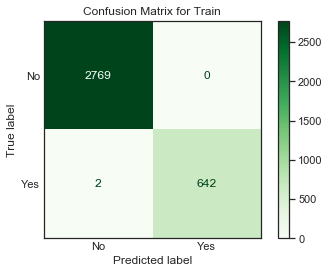

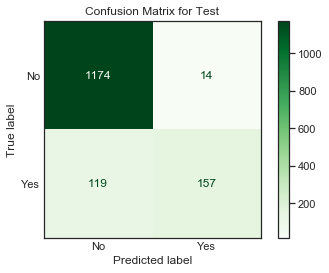

In [113]:
bagging_tuned=get_metrics_score(bgcht,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)


### observations

##### 1. the f1_score of the tuned bagging classifier has increased from 0.67 to 0.70
##### 2. the model is overfitted

In [114]:

comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1',ascending=False)


Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
5  Tuned Bagging Classifier         0.99941        0.90915       0.99689   
1        Bagging Classifier         0.99180        0.90027       0.95652   
2             Random Forest         1.00000        0.89481       1.00000   
0             Decision Tree         1.00000        0.86066       1.00000   
4       Tuned Random Forest         0.86288        0.83880       0.72826   
3       Tuned Decision Tree         0.76297        0.76366       0.66460   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
5      0.56884          1.00000         0.91813   0.99844  0.70246  
1      0.55435          1.00000         0.86932   0.97778  0.67699  
2      0.50725          1.00000         0.88608   1.00000  0.64516  
0      0.56884          1.00000         0.64876   1.00000  0.60618  
4      0.63406          0.61549         0.56452   0.66714  0.59727  
3      0.66304          0.41920         0.41972   0.51411  0.51404

## Model Boosting Classifier

### AdaBoost

In [115]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.84061        0.84290       0.28727      0.30072   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.68519         0.69167         0.40481        0.41919

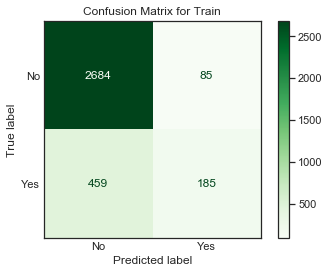

In [116]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)


### Observation
### 1. Adaboost did not overfit the data
### 2. but its f1 score is really low

### Gradient Boosting Algorithm

In [117]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.88046        0.86612       0.44099      0.39855   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.85542         0.78571         0.58197        0.52885

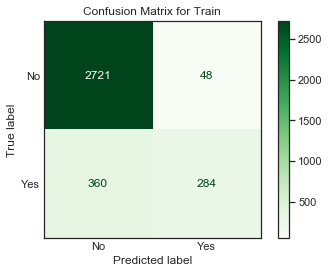

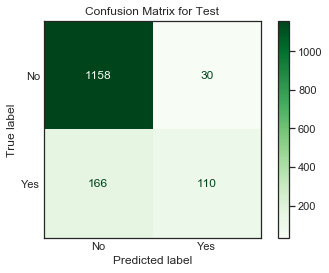

In [118]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)


### Observation
### 1. Gradient boosting algorithm also did not overfit
### 2. the f1 score is a littlebit better

In [119]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99531        0.89891       0.97516      0.59783   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.81683         0.98742        0.69038

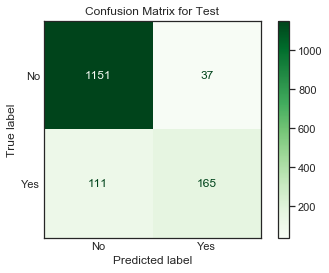

In [120]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)


### Observation
### 1. XGBoost classifier overfit the data
### 2. the f1 score is much better

###  Model Performance Evaluation and Improvement-Boosting


In [121]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1',ascending=False)


Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
5  Tuned Bagging Classifier         0.99941        0.90915       0.99689   
8                   XGboost         0.99531        0.89891       0.97516   
1             Random Forest         0.99180        0.90027       0.95652   
2        Bagging Classifier         1.00000        0.89481       1.00000   
0             Decision Tree         1.00000        0.86066       1.00000   
4       Tuned Random Forest         0.86288        0.83880       0.72826   
7            Gradient Boost         0.88046        0.86612       0.44099   
3       Tuned Decision Tree         0.76297        0.76366       0.66460   
6                  AdaBoost         0.84061        0.84290       0.28727   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
5      0.56884          1.00000         0.91813   0.99844  0.70246  
8      0.59783          1.00000         0.81683   0.98742  0.69038  
1      0.55435          1.00000         0.86932   0.97778  0.67699  
2      0.50725          1.00000         0.88608   1.00000  0.64516  
0      0.56884          1.00000         0.64876   1.00000  0.60618  
4      0.63406          0.61549         0.56452   0.66714  0.59727  
7      0.39855          0.85542         0.78571   0.58197  0.52885  
3      0.66304          0.41920         0.41972   0.51411  0.51404  
6      0.30072          0.68519         0.69167   0.40481  0.41919

In [122]:
# choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    #let"s try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
    "n_estimators": np.arange(10,60,10),
    "learning_rate": [0.05,0.15,0.45,0.75,0.85,0.9]
}

# type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.85, random_state=1)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.92382        0.86202       0.69410      0.51812   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.87647         0.67453         0.77470        0.58607

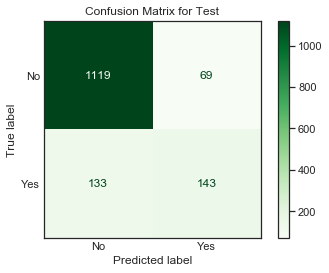

In [123]:
abc_tuned_score=get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test)
add_score_model(abc_tuned_score)


In [124]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
MonthlyIncome              0.39009
Age                        0.18640
NumberOfTrips              0.05157
Gender_Male                0.03654
Passport_1                 0.03460
Designation_Manager        0.03318
PreferredPropertyStar      0.03210
MaritalStatus_Single       0.02707
Designation_Senior Manager 0.02680
Designation_Executive      0.02178
NumberOfPersonVisiting     0.02176
CityTier_2                 0.01955
CityTier_3                 0.01938
OwnCar_1                   0.01660
TypeofContact_Self Enquiry 0.01379
MaritalStatus_Married      0.01357
Occupation_Large Business  0.01288
NumberOfChildrenVisiting   0.01238
MaritalStatus_Unmarried    0.00958
Occupation_Salaried        0.00849
Occupation_Small Business  0.00799
Designation_VP             0.00390


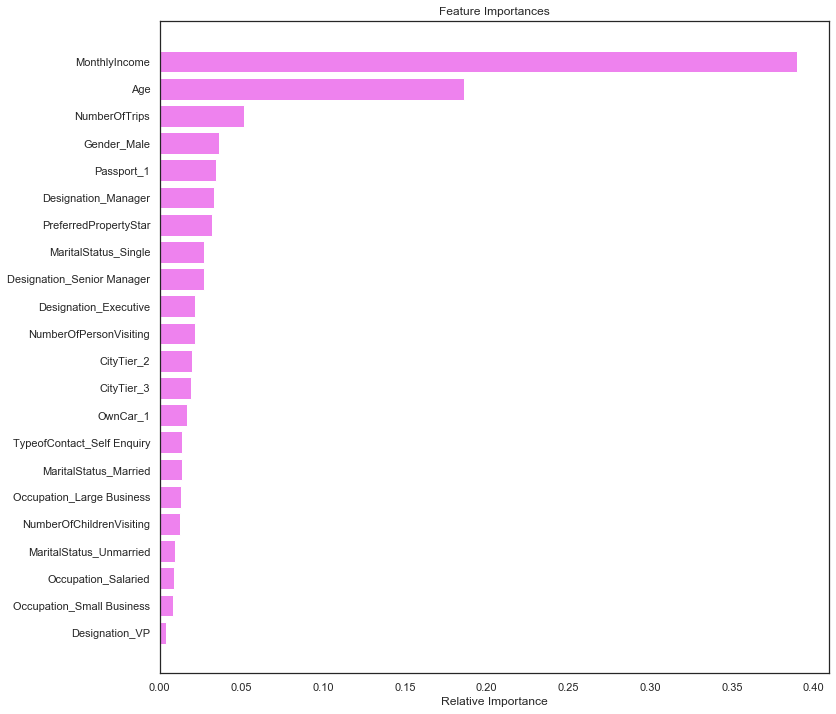

In [125]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Tuned Gradient Boosting Classifier¶


In [126]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    "learning_rate": [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)



GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.5, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.8)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.90243        0.86885       0.59317      0.46739   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.84327         0.74138         0.69644        0.57333

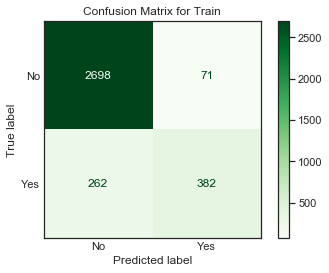

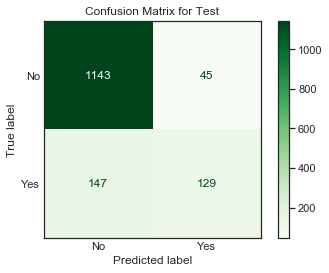

In [127]:
gbc_tuned_score=get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)
add_score_model(gbc_tuned_score)


In [128]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
MonthlyIncome              0.25436
Age                        0.14278
Passport_1                 0.13755
Designation_Executive      0.10152
NumberOfTrips              0.07637
CityTier_3                 0.05005
MaritalStatus_Unmarried    0.03302
PreferredPropertyStar      0.03156
Occupation_Large Business  0.02808
MaritalStatus_Single       0.02741
TypeofContact_Self Enquiry 0.02022
CityTier_2                 0.01514
Designation_Manager        0.01279
Designation_Senior Manager 0.01266
Gender_Male                0.01141
Occupation_Salaried        0.01104
NumberOfPersonVisiting     0.01002
NumberOfChildrenVisiting   0.00626
Occupation_Small Business  0.00613
MaritalStatus_Married      0.00449
OwnCar_1                   0.00388
Designation_VP             0.00325


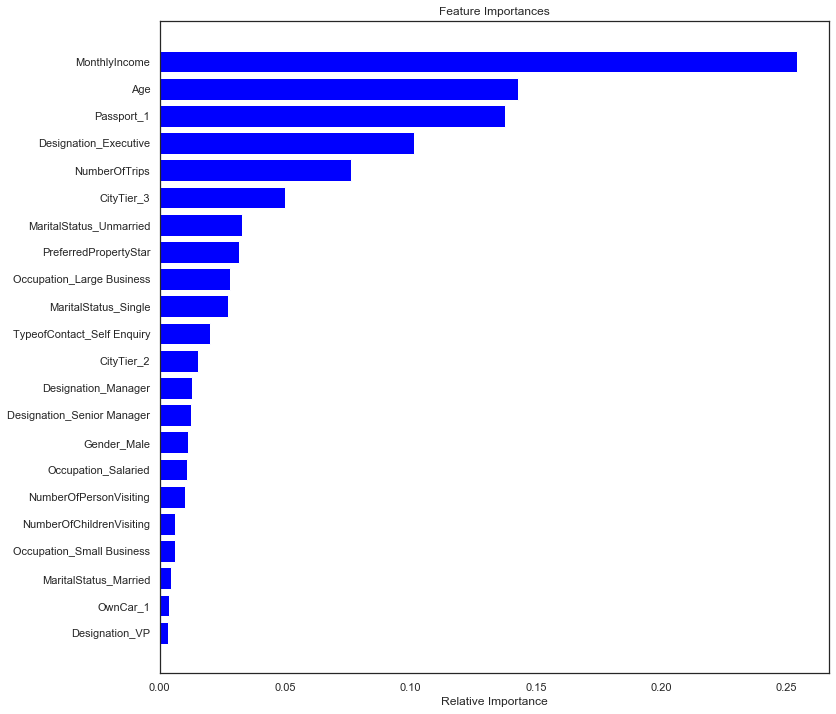

In [129]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


###  Tuned XGBoost Classifier


In [130]:
# choose the classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
    "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.55, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99502        0.88183       0.97671      0.54710   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.99683         0.75879         0.98667        0.63579

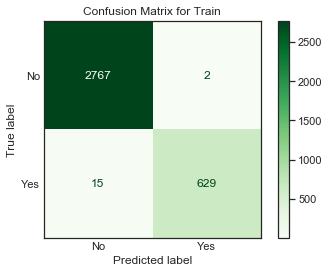

In [131]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)


In [132]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
Designation_Executive      0.12310
Passport_1                 0.09864
Occupation_Large Business  0.06991
CityTier_3                 0.05699
MaritalStatus_Single       0.05534
CityTier_2                 0.05344
MaritalStatus_Unmarried    0.05144
TypeofContact_Self Enquiry 0.04741
NumberOfTrips              0.04149
MonthlyIncome              0.03654
MaritalStatus_Married      0.03545
Age                        0.03526
PreferredPropertyStar      0.03442
Occupation_Small Business  0.03436
Designation_Senior Manager 0.03394
Designation_VP             0.03305
Designation_Manager        0.02996
NumberOfPersonVisiting     0.02922
Occupation_Salaried        0.02851
Gender_Male                0.02795
NumberOfChildrenVisiting   0.02401
OwnCar_1                   0.01958


In [133]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


###  Stacking Classifier
####  We can Random forest classifier,Tuned Random Forest,  Tuned Bagging classifier and Bagging Classifier. These four models have least comparable overfitting issue and are good performance metrics.



In [134]:
estimators=[('Bagging Classifier', bagging_classifier),('Tuned Random Forest', rf_tuned), ('Random Forest', Rf)]
final_estimator=rf_tuned




In [135]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_estimator.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(random_state=1, verbose=1)),
                               ('Tuned Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       max_depth=15,
                                                       max_samples=0.3,
                                                       min_samples_leaf=5,
                                                       n_estimators=500,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1))],
                   final_estimator=RandomForestClassifier(class_weight={0: 0.15,
                                                                        1: 0.85},
       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99854        0.90096       1.00000      0.82609   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.99230         0.70154         0.99613        0.75874

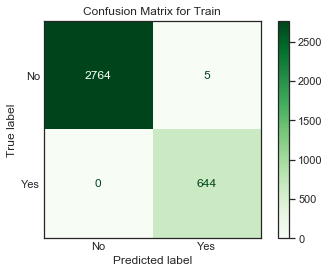

In [136]:
stacking_estimator_score=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)
add_score_model(stacking_estimator_score)

In [137]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          'Tuned AdaBoost',
                                          'Tuned Gradient Boost',
                                          'Tuned XGboost',
                                          'Stacking'
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
12                  Stacking         0.99854        0.90096       1.00000   
5   Tuned Bagging Classifier         0.99941        0.90915       0.99689   
8                    XGboost         0.99531        0.89891       0.97516   
1              Random Forest         0.99180        0.90027       0.95652   
2         Bagging Classifier         1.00000        0.89481       1.00000   
11             Tuned XGboost         0.99502        0.88183       0.97671   
0              Decision Tree         1.00000        0.86066       1.00000   
4        Tuned Random Forest         0.86288        0.83880       0.72826   
9             Tuned AdaBoost         0.92382        0.86202       0.69410   
10      Tuned Gradient Boost         0.90243        0.86885       0.59317   
7             Gradient Boost         0.88046        0.86612       0.44099   
3        Tuned Decision Tree         0.76297        0.76366       0.66460   
6                   AdaBoost         0.84061        0.84290       0.28727   

    Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
12      0.82609          0.99230         0.70154   0.99613  0.75874  
5       0.56884          1.00000         0.91813   0.99844  0.70246  
8       0.59783          1.00000         0.81683   0.98742  0.69038  
1       0.55435          1.00000         0.86932   0.97778  0.67699  
2       0.50725          1.00000         0.88608   1.00000  0.64516  
11      0.54710          0.99683         0.75879   0.98667  0.63579  
0       0.56884          1.00000         0.64876   1.00000  0.60618  
4       0.63406          0.61549         0.56452   0.66714  0.59727  
9       0.51812          0.87647         0.67453   0.77470  0.58607  
10      0.46739          0.84327         0.74138   0.69644  0.57333  
7       0.39855          0.85542         0.78571   0.58197  0.52885  
3       0.66304          0.41920         0.41972   0.51411  0.51404  
6       0.30072          0.68519         0.69167   0.40481  0.41919

### Observations

##### Stacking model had the highest f1_score , but this model tends to overfit.  To get amore generalise model we can tune the model with weak learners
##### Tuned bagging classifier also performed better , but it is also overfitting the data. We can also tune the model with different parameters to get a generalised model
##### Tuned random forest and gradient boost classifier gave a more generalised model, but we can imporve their performance by tuning their parameters


#### Conclusion

##### looking at feature importance Designation, Passport, Tier city, Marital status, Occupation, Age. Income could also be looked into, because some model gave it a higher importance
##### Gender, Owning a car, Number of children visiting seemed to be insignificant

### Buisness Insights & Recommendations

#####   We have been able to build a predictive model:

#####   a) that the company can deploy to identify customers who will be interested in purchasing the Travel package.

#####   b) that the company can use to find the key factors that will have an impact on a customer taking a product or not.

#####   Most important features that have an impact on Product taken: Desgination, Passport,TierCity,Martialstatus,occupation

#####   Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.

#####  Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
#####  Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package are:
##### Having a higher duration of pitch by salesman to the customer.
#####  Getting a PitchSatisfactionScore of 3 or 5.
#####  Having multiple follow ups with the customers.
#####  Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
##### Mostly Single customers are accpeting a package , reason may be married couples might have kids , provding a property , with child care services can get married couples put off.